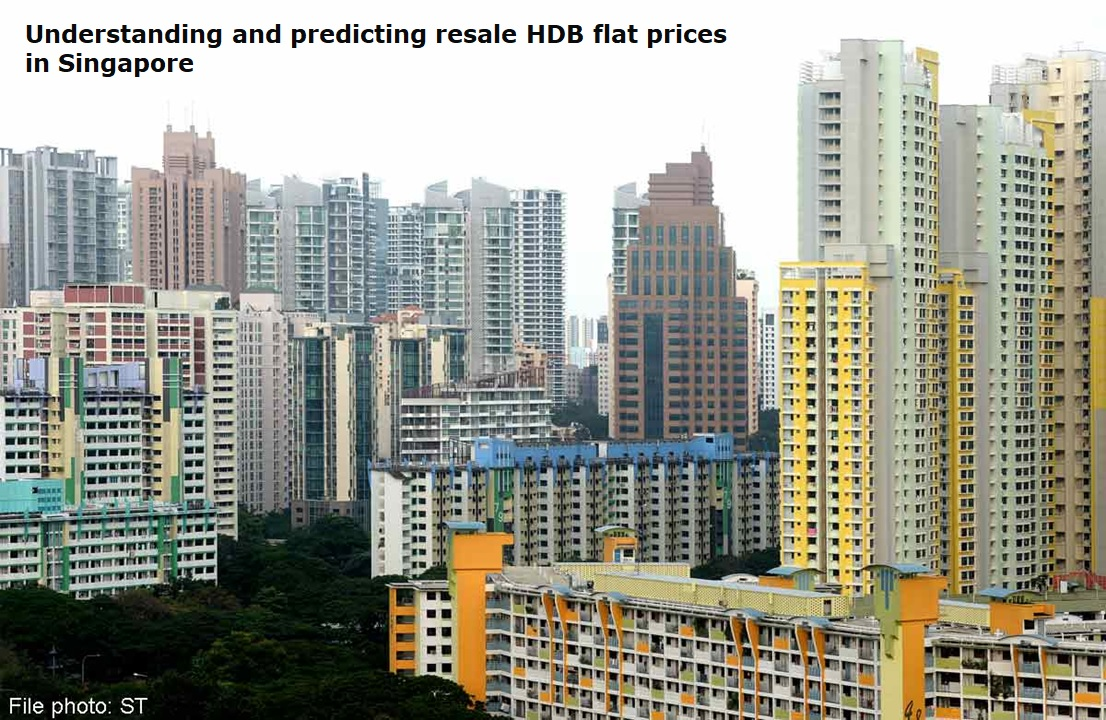

__Introduction__: The majority of the residential housing in Singapore are HDB flats and a large proportion of transactions happen 
for in the resale market. <br> It is important to have good understanding of properties that influence the market value of a HDB flat, in order 
to obtain good prices as either a buyer <br>or a seller. The goal this project is to predict the resale price of a HDB flat based on its properties. 
To make better prediction, exploratory data analysis and data preprocessing, feature engineering and model selection have been performed.

# Data Source

The dataset was obtained from **https://data.gov.sg/dataset/resale-flat-prices.** <br> This dataset provided by the Housing Development Board has information on all resale HDB flat transactions from 1990 to mid September 2022. <br> The features in this dataset are as follows:
1) month: month the transaction happened.<br>
2) town: the town where the HDB flat is located.<br>
3) flat_type: the type of HDB flat, there are 1-room flats up to 5-room flats, as well as executive flats and multi-generational flats.<br>
4) block: the block of the associated HDB flat.<br>
5) street: the street where the HDB flat is located.<br>
6) storey_range: the storey range is given in a range in the datasets (e.g. 1 to 3 , means the flat located in either 1st, 2nd or 3rd storey).<br>
7) floor_area_sqm: the floor area of the HDB flat in square meters.<br>
8) remaining_lease: the remaining lease of the HDB flat in months and years.<br>
9) lease_commence_date: the year the lease of HDB flat commenced.<br>
10) resale_price: the resale price of the HDB flat.<br>

In [1]:
# Importing essential library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install tabulate


# Data Loading

In [3]:
#loading the data
#putting r before normal string to convert it to a raw string
hdbprice1990 = pd.read_csv(r"C:\Users\HP\Documents\NTUC Modules\Machine Learning\HDB price prediction\resale-flat-prices-based-on-approval-date-1990-1999.csv")
hdbprice2000 = pd.read_csv(r"C:\Users\HP\Documents\NTUC Modules\Machine Learning\HDB price prediction\resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
hdbprice2012 = pd.read_csv(r"C:\Users\HP\Documents\NTUC Modules\Machine Learning\HDB price prediction\resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
hdbprice2015 = pd.read_csv(r"C:\Users\HP\Documents\NTUC Modules\Machine Learning\HDB price prediction\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
hdbprice2017onwards = pd.read_csv(r"C:\Users\HP\Documents\NTUC Modules\Machine Learning\HDB price prediction\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")


# Exploratory Data Analysis (EDA)

After loading the dataset, exploratory data analysis was performed to investigate the datasets so as to understand the data and get insights. By using ".head()" function of pandas library, the data structure was found to contain 10 features in first 3 datasets and 11 features (additional feature was "remaining_lease") in the last 2 datasets. The target is "resale_price" <br>

After combining the data using ".concat" function of pandas library, using ".info" revealed the columns and their corresponding datatypes, as well as null values under "remaining_lease" column. There were 882010 records in total, starting from year 1990 until mid of 2022. Applying ".isna().sum()" showed that there were 709050 null values under "remaining_lease" column.


In [4]:
hdbprice1990.head()

month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            31.0        IMPROVED                 1977          9000  
1            31.0        IMPROVED                 1977          6000  
2            31.0        IMPROVED                 1977          8000  
3            31.0        IMPROVED                 1977          6000  
4            73.0  NEW GENERATION                 1976         47200

In [5]:
hdbprice2000.head()

month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2  2000-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3  2000-01  ANG MO KIO    3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4  2000-01  ANG MO KIO    3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            69.0        Improved                 1986      147000.0  
1            61.0        Improved                 1986      144000.0  
2            73.0  New Generation                 1976      159000.0  
3            73.0  New Generation                 1976      167000.0  
4            67.0  New Generation                 1976      163000.0

In [6]:
hdbprice2012.head()

month        town flat_type block        street_name storey_range  \
0  2012-03  ANG MO KIO    2 ROOM   172   ANG MO KIO AVE 4     06 TO 10   
1  2012-03  ANG MO KIO    2 ROOM   510   ANG MO KIO AVE 8     01 TO 05   
2  2012-03  ANG MO KIO    3 ROOM   610   ANG MO KIO AVE 4     06 TO 10   
3  2012-03  ANG MO KIO    3 ROOM   474  ANG MO KIO AVE 10     01 TO 05   
4  2012-03  ANG MO KIO    3 ROOM   604   ANG MO KIO AVE 5     06 TO 10   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            45.0        Improved                 1986      250000.0  
1            44.0        Improved                 1980      265000.0  
2            68.0  New Generation                 1980      315000.0  
3            67.0  New Generation                 1984      320000.0  
4            67.0  New Generation                 1980      321000.0

In [7]:
hdbprice2015.head()

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  remaining_lease  \
0            60.0        Improved                 1986               70   
1            68.0  New Generation                 1981               65   
2            69.0  New Generation                 1980               64   
3            68.0  New Generation                 1979               63   
4            68.0  New Generation                 1980               64   

   resale_price  
0      255000.0  
1      275000.0  
2      285000.0  
3      290000.0  
4      290000.0

In [8]:
hdbprice2017onwards.head()

month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.0  
4      265000.0

In [9]:
#Concatenating first 3 dataframes first as they dont have "remaining lease" column 
#Concatenating the above with the balance 2 dataframes using axis=0 to apply column-wise concatenation
#Setting ignore_index = True will ignore the index values in the inputs, and Pandas will generate a new index for the output and will be labeled 0 , 1 , … n - 1 .
#If sort=False and the second DafaFrame has columns that are not in the first, they are appended to the end with no sorting

hdbprices = pd.concat ([hdbprice1990, hdbprice2000, hdbprice2012])
hdbprices = pd.concat ([hdbprices, hdbprice2015, hdbprice2017onwards], axis =0, ignore_index =True, sort = False)


In [10]:
#checking whether the dataset is proper using ".info" method
hdbprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882010 entries, 0 to 882009
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                882010 non-null  object 
 1   town                 882010 non-null  object 
 2   flat_type            882010 non-null  object 
 3   block                882010 non-null  object 
 4   street_name          882010 non-null  object 
 5   storey_range         882010 non-null  object 
 6   floor_area_sqm       882010 non-null  float64
 7   flat_model           882010 non-null  object 
 8   lease_commence_date  882010 non-null  int64  
 9   resale_price         882010 non-null  float64
 10  remaining_lease      172960 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 74.0+ MB


In [11]:
hdbprices.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [12]:
hdbprices.head()

month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            31.0        IMPROVED                 1977        9000.0   
1            31.0        IMPROVED                 1977        6000.0   
2            31.0        IMPROVED                 1977        8000.0   
3            31.0        IMPROVED                 1977        6000.0   
4            73.0  NEW GENERATION                 1976       47200.0   

  remaining_lease  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [13]:
hdbprices["flat_type"].value_counts()

4 ROOM              332685
3 ROOM              284889
5 ROOM              185048
EXECUTIVE            66914
2 ROOM               10650
1 ROOM                1292
MULTI GENERATION       279
MULTI-GENERATION       253
Name: flat_type, dtype: int64

In [14]:
hdbprices["storey_range"].value_counts()

04 TO 06    222282
07 TO 09    200512
01 TO 03    178587
10 TO 12    170395
13 TO 15     57749
16 TO 18     22144
19 TO 21     10542
22 TO 24      6859
25 TO 27      3041
01 TO 05      2700
06 TO 10      2474
28 TO 30      1375
11 TO 15      1259
31 TO 33       494
34 TO 36       460
37 TO 39       423
16 TO 20       265
40 TO 42       209
21 TO 25        92
43 TO 45        46
46 TO 48        40
26 TO 30        39
49 TO 51        14
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

In [15]:
hdbprices ["flat_model"].unique ()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [16]:
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("IMPROVED","Improved")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("NEW GENERATION","New Generation")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("MODEL A","Model A")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("STANDARD","Standard")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("SIMPLIFIED","Simplified")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("MODEL A-MAISONETTE","Maisonette")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("Model A-Maisonette","Maisonette")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("APARTMENT","Apartment")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("MAISONETTE","Maisonette")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("TERRACE","Terrace")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("2-ROOM","2-Room")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("2-room","2-Room")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("IMPROVED-MAISONETTE","Executive Maisonette")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("Improved-Maisonette","Executive Maisonette")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("MULTI GENERATION","Multi Generation")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("PREMIUM APARTMENT","Premium Apartment")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("Premium Maisonette","Executive Maisonette")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("Premium Apartment Loft","Premium Apartment")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("PREMIUM Apartment","Premium Apartment")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("Type S1","Type S1S2")
hdbprices["flat_model"] = hdbprices["flat_model"].str.replace ("Type S2","Type S1S2")

In [17]:
hdbprices["flat_model"].value_counts()

Model A                 247113
Improved                231194
New Generation          183753
Simplified               55897
Premium Apartment        42206
Standard                 41452
Apartment                34109
Maisonette               29620
Model A2                  9646
DBSS                      2799
Adjoined flat             1181
Model A-Maisonette         982
Terrace                    675
Type S1S2                  576
Multi Generation           532
Executive Maisonette       205
2-Room                      67
3Gen                         3
Name: flat_model, dtype: int64

# Analysis of data from 2015

Since the analysis was needed only from 2015 onwards, to understand the past 7 years' trend, used the relevant data to understand and uncover insights on HDB resale price trends. 

In [18]:
hdbpricesfrom2015 = pd.concat([hdbprice2015, hdbprice2017onwards], axis =0, ignore_index =True, sort = False)

In [19]:
#checking the dataset size
hdbpricesfrom2015.shape

(172960, 11)

In [20]:
hdbpricesfrom2015.head()

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date remaining_lease  \
0            60.0        Improved                 1986              70   
1            68.0  New Generation                 1981              65   
2            69.0  New Generation                 1980              64   
3            68.0  New Generation                 1979              63   
4            68.0  New Generation                 1980              64   

   resale_price  
0      255000.0  
1      275000.0  
2      285000.0  
3      290000.0  
4      290000.0

In [21]:
hdbpricesfrom2015.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172960 entries, 0 to 172959
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                172960 non-null  object 
 1   town                 172960 non-null  object 
 2   flat_type            172960 non-null  object 
 3   block                172960 non-null  object 
 4   street_name          172960 non-null  object 
 5   storey_range         172960 non-null  object 
 6   floor_area_sqm       172960 non-null  float64
 7   flat_model           172960 non-null  object 
 8   lease_commence_date  172960 non-null  int64  
 9   remaining_lease      172960 non-null  object 
 10  resale_price         172960 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 14.5+ MB


In [22]:
# month is represented as a string, it has been converted into a datetime object using the to_datetime() function of Pandas.
hdbpricesfrom2015 ["month"] = pd.to_datetime(hdbpricesfrom2015["month"])

In [23]:
#which years have null values
hdbpricesfrom2015[hdbpricesfrom2015.isnull().any(axis=1)]["month"].dt.year.unique()

array([], dtype=int64)

In [24]:
hdbpricesfrom2015 ["town"].unique() #26 towns

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

Among the 26 towns, Sengkang has the highest number of resale transactions of 14,192. 

In [25]:
hdbpricesfrom2015['town'].value_counts()

SENGKANG           14192
JURONG WEST        11943
WOODLANDS          11846
TAMPINES           11782
PUNGGOL            11471
YISHUN             11364
BEDOK               9816
HOUGANG             8596
CHOA CHU KANG       7949
ANG MO KIO          7575
BUKIT PANJANG       6674
BUKIT MERAH         6640
BUKIT BATOK         6013
TOA PAYOH           5481
PASIR RIS           5418
KALLANG/WHAMPOA     5197
QUEENSTOWN          4863
GEYLANG             4386
SEMBAWANG           4222
CLEMENTI            4053
JURONG EAST         3697
SERANGOON           3399
BISHAN              3318
CENTRAL AREA        1538
MARINE PARADE       1078
BUKIT TIMAH          449
Name: town, dtype: int64

In [26]:
hdbpricesfrom2015 ["flat_type"].unique() # 7 flat_types

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [27]:
hdbpricesfrom2015["flat_type"] = hdbpricesfrom2015["flat_type"].str.replace ("MULTI-GENERATION","MULTI GENERATION")
hdbpricesfrom2015["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI GENERATION'], dtype=object)

Among the 7 different types of flat, 4 room has the highest resale transactions of 71,843. <br>
This may be because 4 room is a popular choice among Singaporeans, as it suitable for families of 4-5 members.

In [28]:
hdbpricesfrom2015 ["flat_type"].value_counts()

4 ROOM              71843
5 ROOM              43322
3 ROOM              41754
EXECUTIVE           13524
2 ROOM               2375
MULTI GENERATION       72
1 ROOM                 70
Name: flat_type, dtype: int64

Storey range 04 to 06 has seen the most transactions of 40,235, followed by storey range 07 to 09 and then by 10 to 12.

In [29]:
hdbpricesfrom2015 ["storey_range"].value_counts() 

04 TO 06    40235
07 TO 09    36568
10 TO 12    32368
01 TO 03    31124
13 TO 15    16232
16 TO 18     7416
19 TO 21     3119
22 TO 24     2274
25 TO 27     1290
28 TO 30      826
31 TO 33      440
34 TO 36      408
37 TO 39      374
40 TO 42      186
43 TO 45       46
46 TO 48       40
49 TO 51       14
Name: storey_range, dtype: int64

In [30]:
hdbpricesfrom2015["floor_area_sqm"].describe() # min floor area is 31sqm and max floor area is 280sqm

count    172960.000000
mean         97.595119
std          24.118811
min          31.000000
25%          82.000000
50%          94.000000
75%         113.000000
max         280.000000
Name: floor_area_sqm, dtype: float64

In [31]:
hdbpricesfrom2015['flat_model'].value_counts()

Model A                   56155
Improved                  43420
New Generation            23572
Premium Apartment         19294
Simplified                 7177
Apartment                  6784
Maisonette                 5103
Standard                   5039
DBSS                       2727
Model A2                   2158
Type S1                     378
Model A-Maisonette          319
Adjoined flat               298
Type S2                     197
Terrace                     103
Premium Apartment Loft       92
Multi Generation             72
2-room                       30
Improved-Maisonette          23
Premium Maisonette           16
3Gen                          3
Name: flat_model, dtype: int64

In [32]:
hdbpricesfrom2015["flat_model"] = hdbpricesfrom2015["flat_model"].str.replace ("2-room","2 Room")
hdbpricesfrom2015["flat_model"] = hdbpricesfrom2015["flat_model"].str.replace ("Improved-Maisonette","Executive Maisonette")
hdbpricesfrom2015["flat_model"] = hdbpricesfrom2015["flat_model"].str.replace ("Premium Maisonette","Executive Maisonette")
hdbpricesfrom2015["flat_model"] = hdbpricesfrom2015["flat_model"].str.replace ("Premium Apartment Loft","Premium Apartment")
hdbpricesfrom2015["flat_model"] = hdbpricesfrom2015["flat_model"].str.replace ("Type S1","Type S1S2")
hdbpricesfrom2015["flat_model"] = hdbpricesfrom2015["flat_model"].str.replace ("Type S2","Type S1S2")

From the original 21 unique flat models, some of the flat models were combined to get the below set of 18 flat models. <br>
Model A is highest transacted flat model. 


In [33]:
hdbpricesfrom2015['flat_model'].value_counts()

Model A                 56155
Improved                43420
New Generation          23572
Premium Apartment       19386
Simplified               7177
Apartment                6784
Maisonette               5103
Standard                 5039
DBSS                     2727
Model A2                 2158
Type S1S2                 575
Model A-Maisonette        319
Adjoined flat             298
Terrace                   103
Multi Generation           72
Executive Maisonette       39
2 Room                     30
3Gen                        3
Name: flat_model, dtype: int64

In [34]:
# checking street name column
hdbpricesfrom2015['street_name'].value_counts() #559 unique street names

YISHUN RING RD        2568
BEDOK RESERVOIR RD    1999
PUNGGOL DR            1817
ANG MO KIO AVE 10     1808
PUNGGOL FIELD         1724
                      ... 
BT MERAH LANE 1          7
KRETA AYER RD            5
SEMBAWANG WAY            3
CANBERRA WALK            3
ALJUNIED AVE 2           1
Name: street_name, Length: 559, dtype: int64

In [35]:
# remaining_lease is represented as string
# the feature is not clean with some having "X Years Y Months" format, while some only have "Months". 
# converting remaining_lease to number of years using isinstance() function which returns True if the specified object is of the specified type, otherwise False.
# using isdigit() function to extract integer from "remaining_lease"; this returns True if all the characters are digits, otherwise, False.

def getYears(text):
    if isinstance(text, str):
        yearmonth = [int(s) for s in text.split() if s.isdigit()]
        if len(yearmonth) > 1: # if there's year and month
            years = yearmonth[0] + (yearmonth[1]/12)
        else: # if only year
            years = yearmonth[0]
        return years
    else: # if int
        return text

hdbpricesfrom2015["remaining_lease"] = hdbpricesfrom2015["remaining_lease"].apply(lambda x: getYears(x))

In [36]:
hdbpricesfrom2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172960 entries, 0 to 172959
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                172960 non-null  datetime64[ns]
 1   town                 172960 non-null  object        
 2   flat_type            172960 non-null  object        
 3   block                172960 non-null  object        
 4   street_name          172960 non-null  object        
 5   storey_range         172960 non-null  object        
 6   floor_area_sqm       172960 non-null  float64       
 7   flat_model           172960 non-null  object        
 8   lease_commence_date  172960 non-null  int64         
 9   remaining_lease      172960 non-null  float64       
 10  resale_price         172960 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 14.5+ MB


In [37]:
hdbpricesfrom2015.shape

(172960, 11)

In [38]:
hdbpricesfrom2015.describe()

floor_area_sqm  lease_commence_date  remaining_lease  resale_price
count   172960.000000        172960.000000    172960.000000  1.729600e+05
mean        97.595119          1994.401758        74.622180  4.642905e+05
std         24.118811            13.202510        13.023434  1.585528e+05
min         31.000000          1966.000000        43.416667  1.400000e+05
25%         82.000000          1984.000000        64.250000  3.500000e+05
50%         94.000000          1994.000000        74.416667  4.300000e+05
75%        113.000000          2003.000000        84.604167  5.450000e+05
max        280.000000          2019.000000        97.750000  1.418000e+06

# Descriptive Analysis

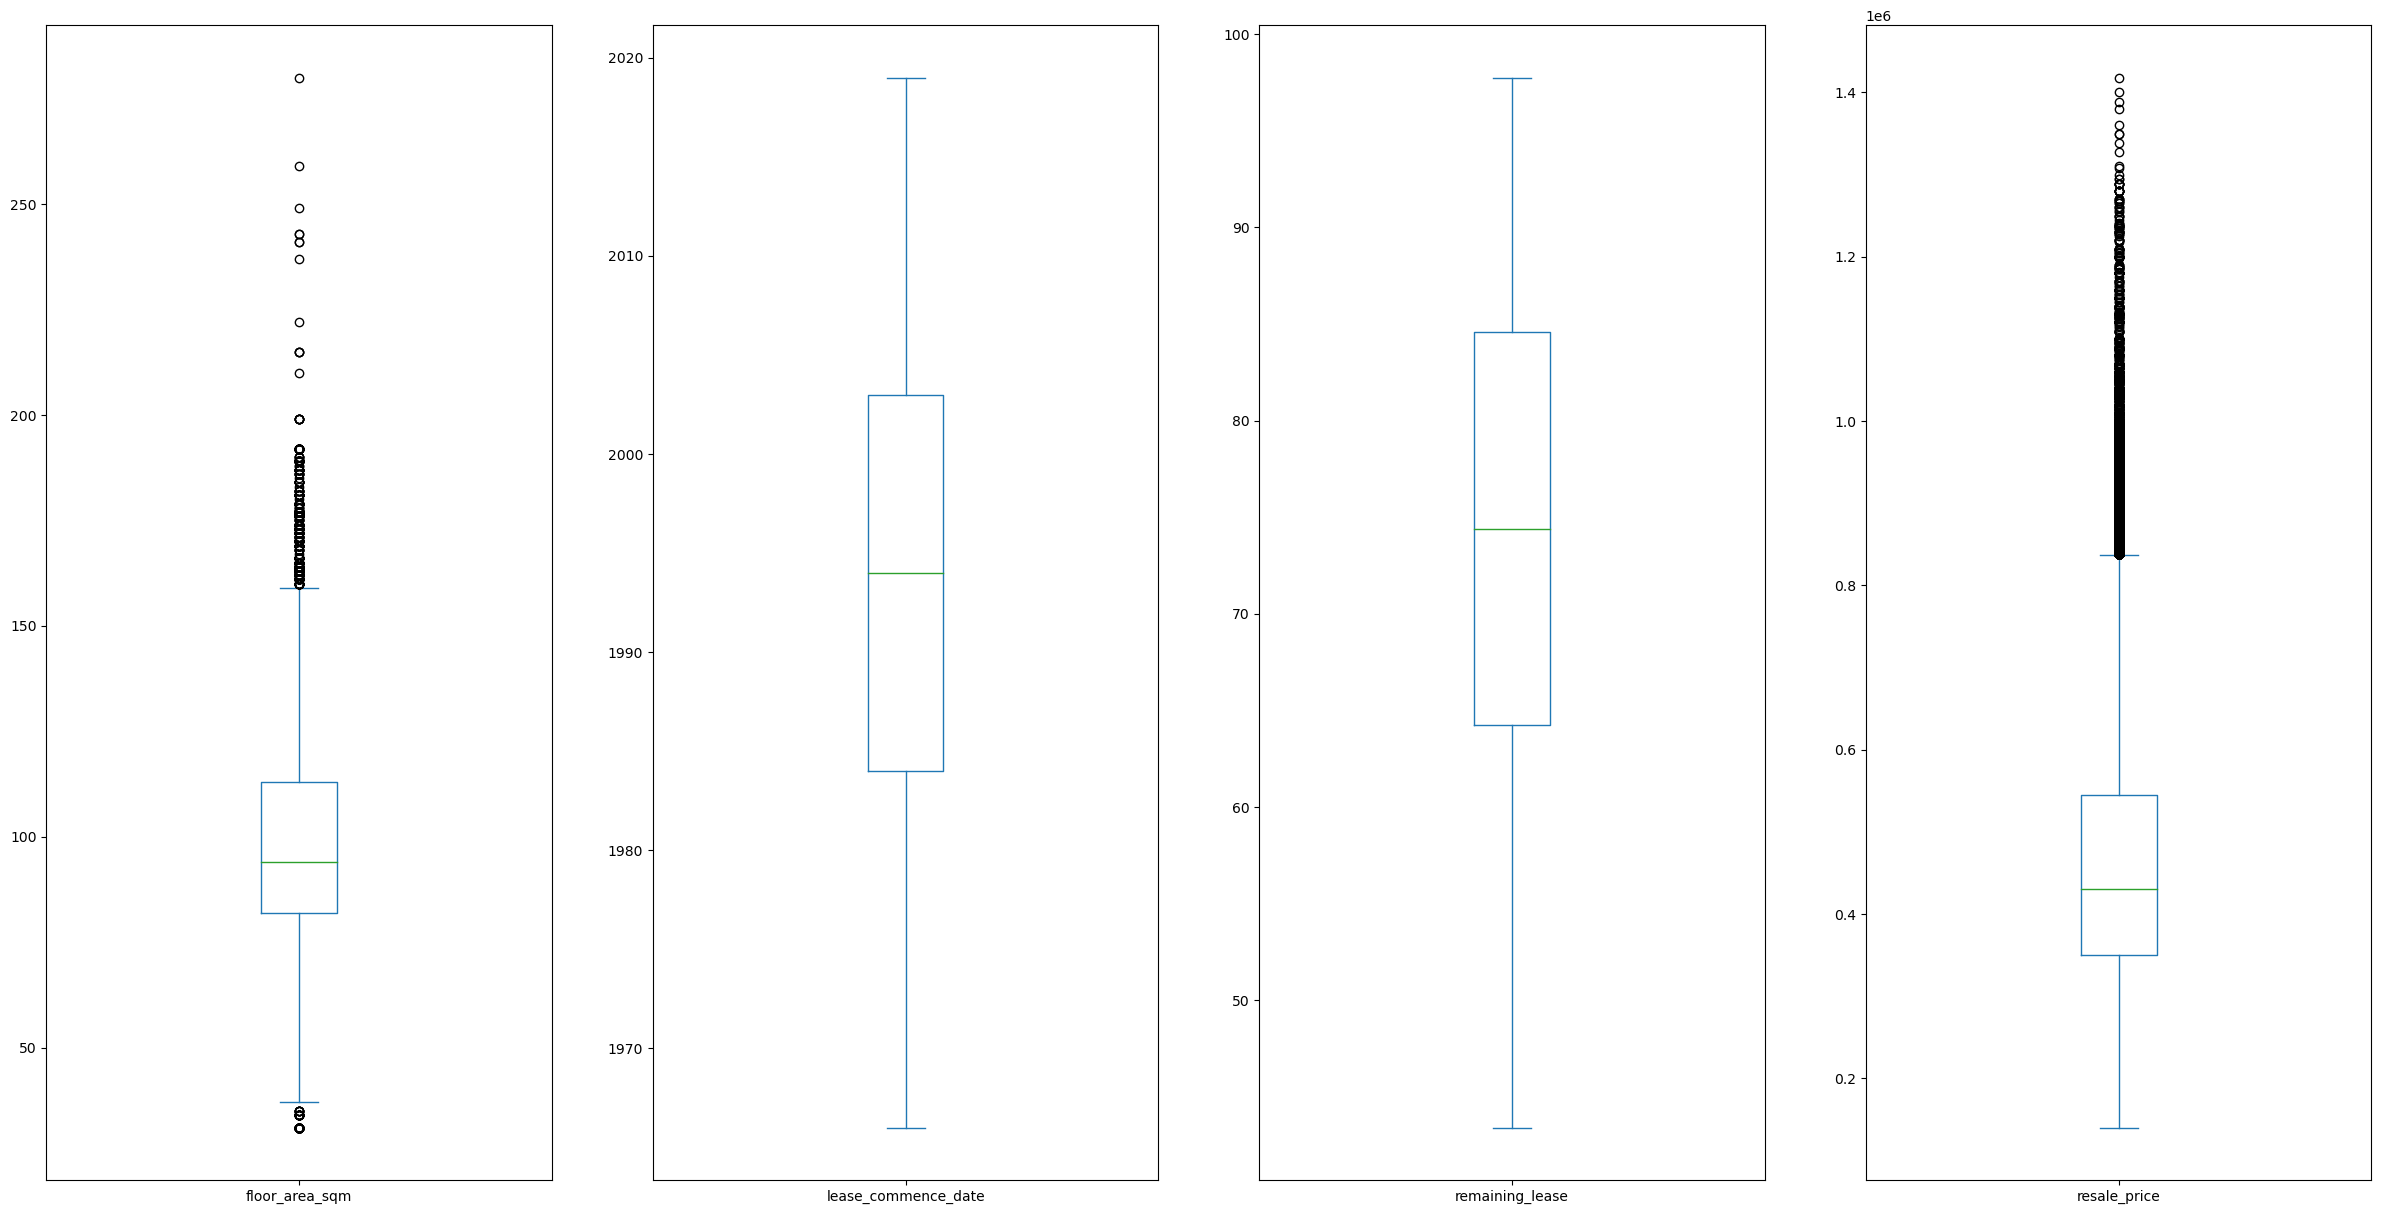

In [39]:
##visualizing numerical features
hdbpricesfrom2015.plot(kind='box', figsize=(30,15), subplots=True, sharey=False)
plt.show()

The above charts give a general trend of numerical features - floor_area_sqm, lease_commence_date, remaining_lease and resale_price.


464290.471565044

430000.0

140000.0

1418000.0

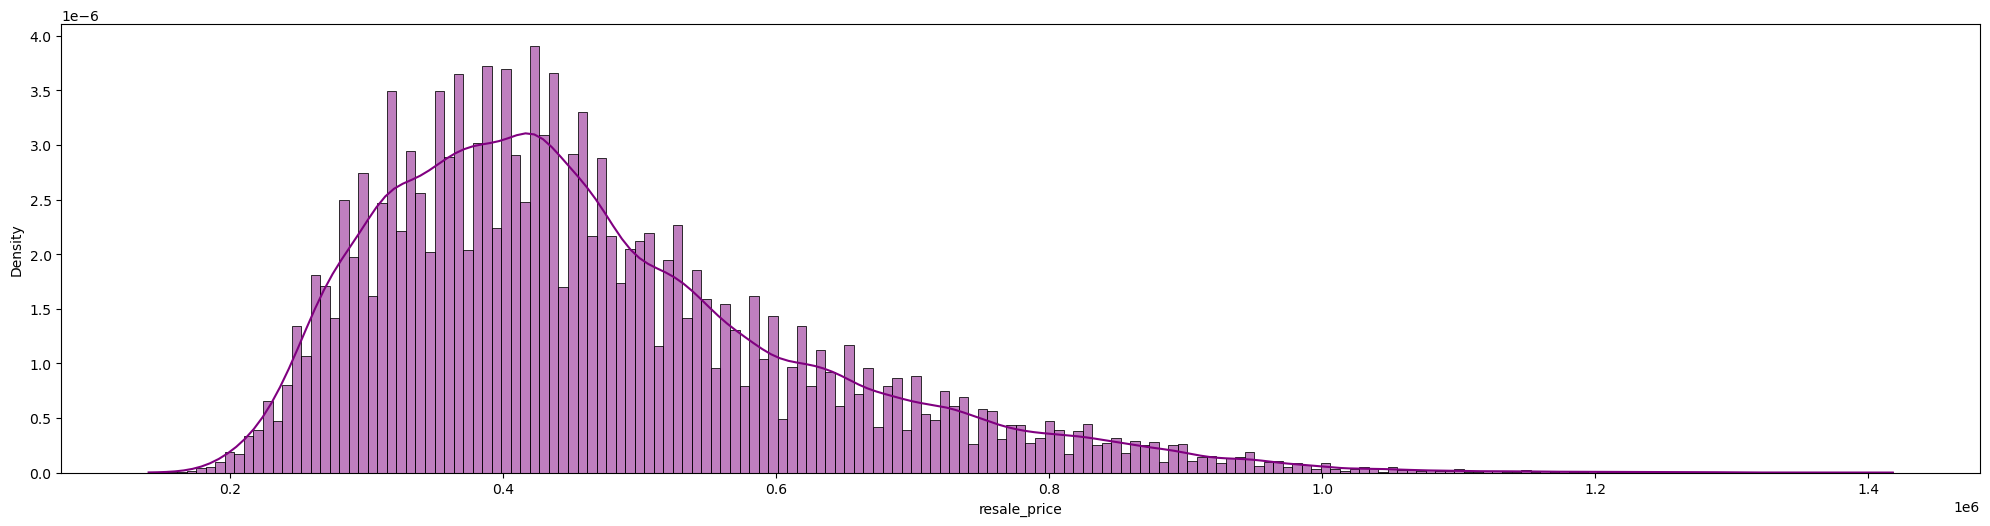

In [40]:
#visualizing resale prices
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,1,1)
sns.histplot(hdbpricesfrom2015["resale_price"], kde=True, stat="density", color="purple")
plt.tight_layout()

resalepricemean = hdbpricesfrom2015["resale_price"].mean()
resalepricemedian = hdbpricesfrom2015["resale_price"].median()
resalepricemin = hdbpricesfrom2015["resale_price"].min()
resalepricemax = hdbpricesfrom2015["resale_price"].max()
display(resalepricemean)
display(resalepricemedian)
display(resalepricemin)
display(resalepricemax)


The histogram for HDB resale prices shows a right-skew distribution, with a mean of 464290 SGD and a median of 430,000 SGD. <br>The resale prices ranged from between 140,000 SGD to 1,418,000 SGD.


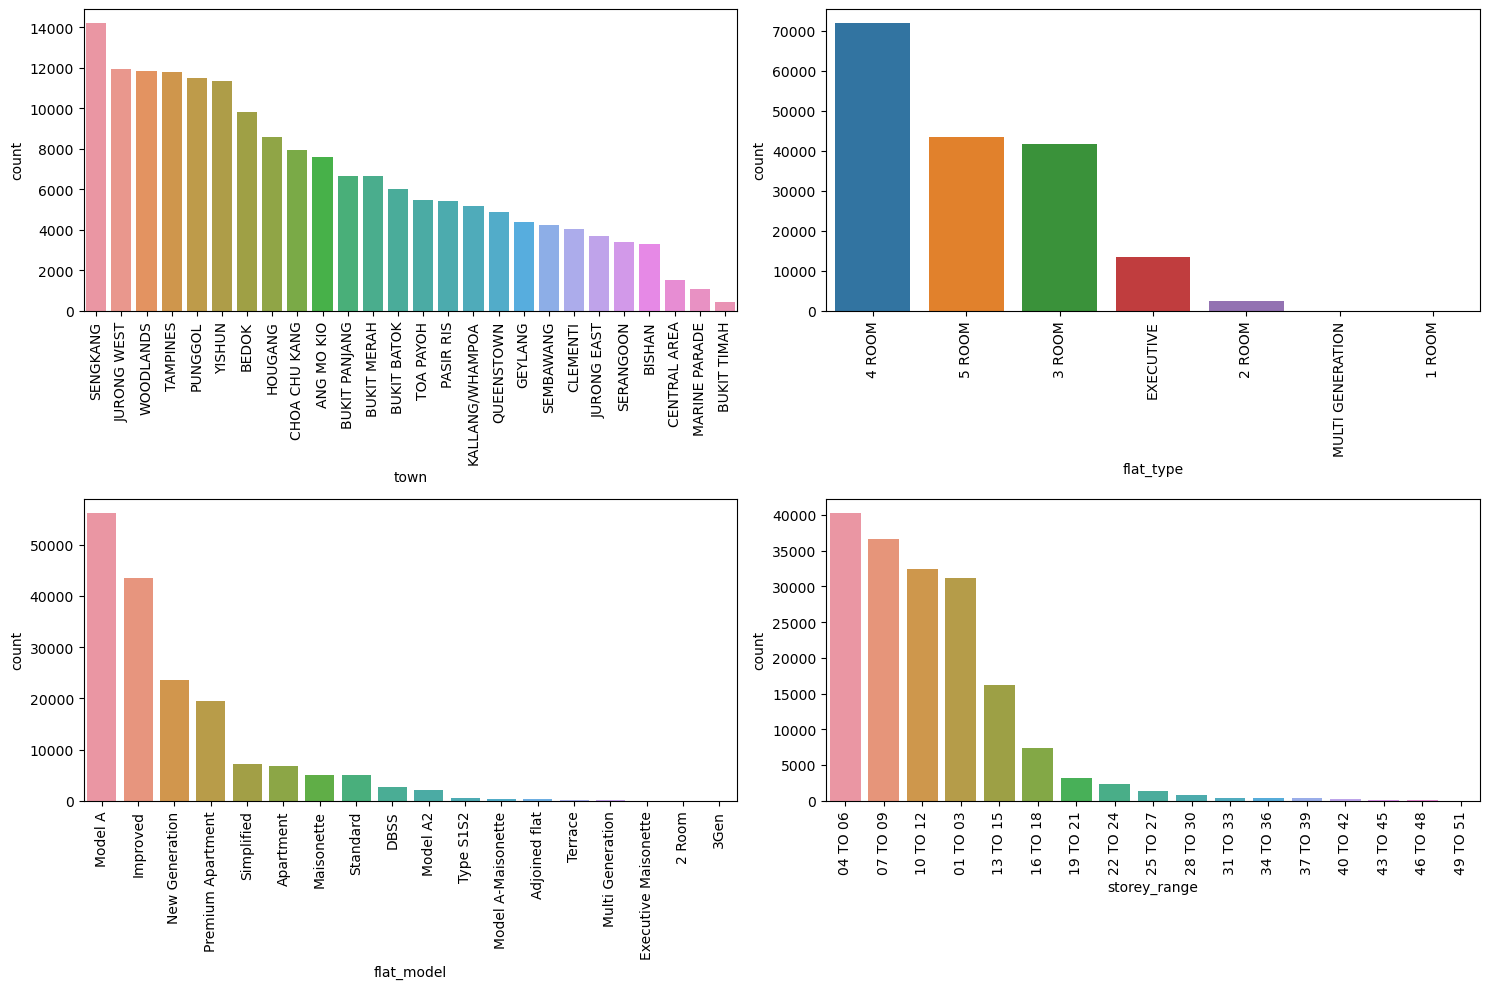

In [41]:
#visualizing against town, flat type, flat model, storey range
fig = plt.figure(figsize=(15,10))
fig.add_subplot(2,2,1)
large_to_small = hdbpricesfrom2015.groupby('town').size().sort_values().index[::-1]
sns.countplot(x = hdbpricesfrom2015["town"], order=large_to_small)
plt.xticks(rotation=90)
fig.add_subplot(2,2,2)
large_to_small = hdbpricesfrom2015.groupby('flat_type').size().sort_values().index[::-1]
sns.countplot(x = hdbpricesfrom2015["flat_type"], order=large_to_small)
plt.xticks(rotation=90)
fig.add_subplot(2,2,3)
large_to_small = hdbpricesfrom2015.groupby('flat_model').size().sort_values().index[::-1]
sns.countplot(x = hdbpricesfrom2015["flat_model"], order=large_to_small)
plt.xticks(rotation=90)
fig.add_subplot(2,2,4)
large_to_small = hdbpricesfrom2015.groupby('storey_range').size().sort_values().index[::-1]
sns.countplot(x = hdbpricesfrom2015["storey_range"], order=large_to_small)
plt.xticks(rotation=90)

plt.tight_layout()



The above charts depict HDB resale transactions for different towns, flat types, flat models and storeys.

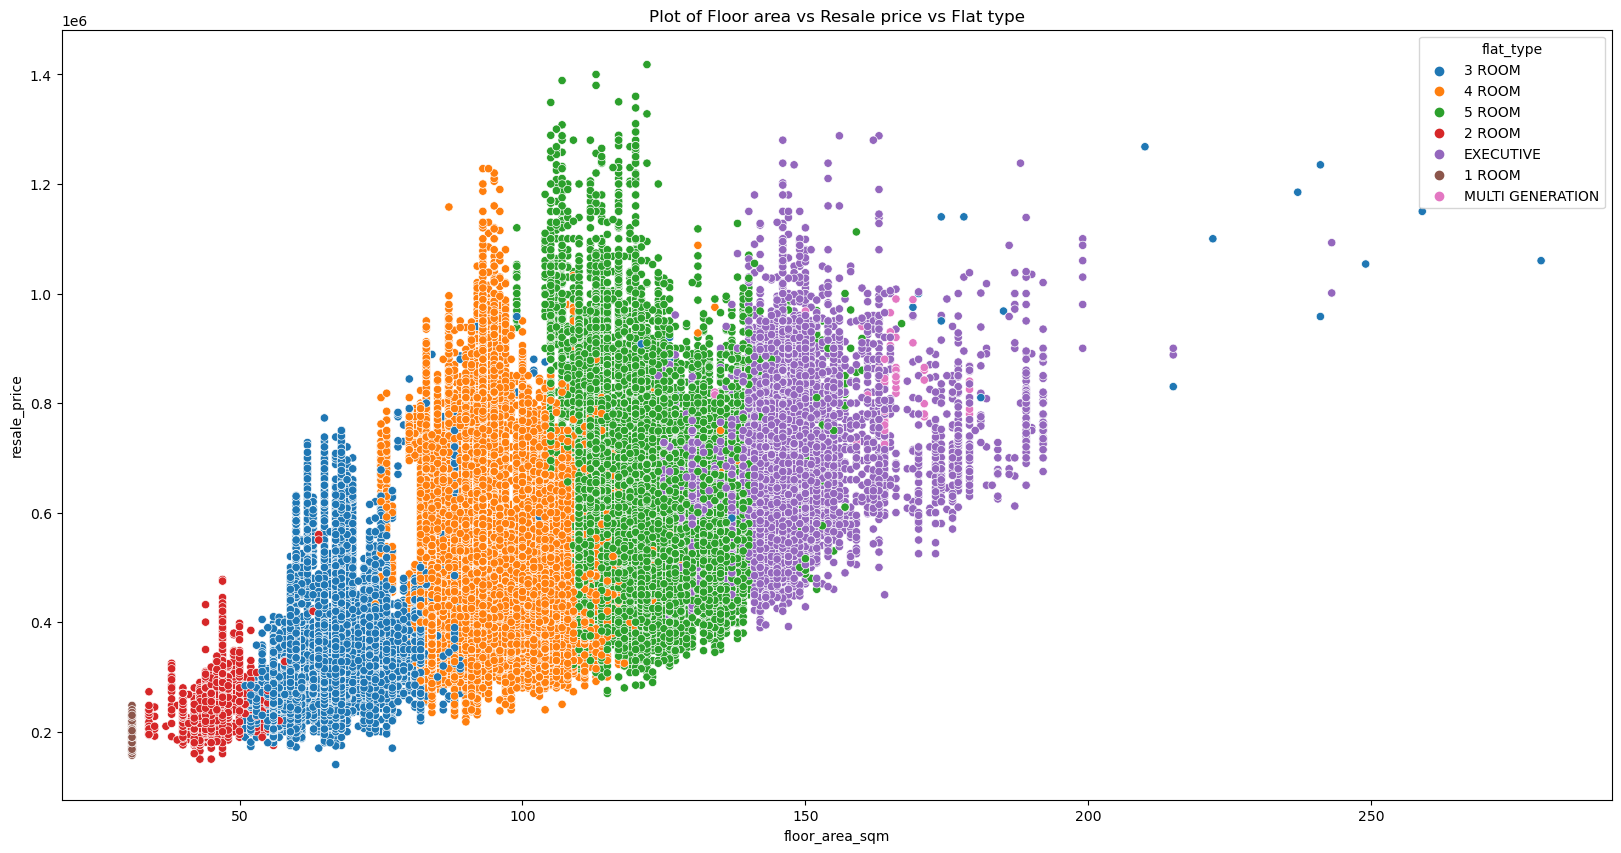

In [42]:
plt.figure(figsize=(20,10))
plt.title("Plot of Floor area vs Resale price vs Flat type")
sns.scatterplot(data=hdbpricesfrom2015, x="floor_area_sqm", y="resale_price", hue="flat_type");

As evident from the above scatterplot, grouped by flat type, the size of a property is positively correlated with the resale price for HDB flats. The same floor area have huge variation in resale prices, likely due to location of the flats. Biggest flat does not have the highest resale price per sqm. Conversely, smaller flat have also high resale price per sqm.

<AxesSubplot:xlabel='flat_type'>

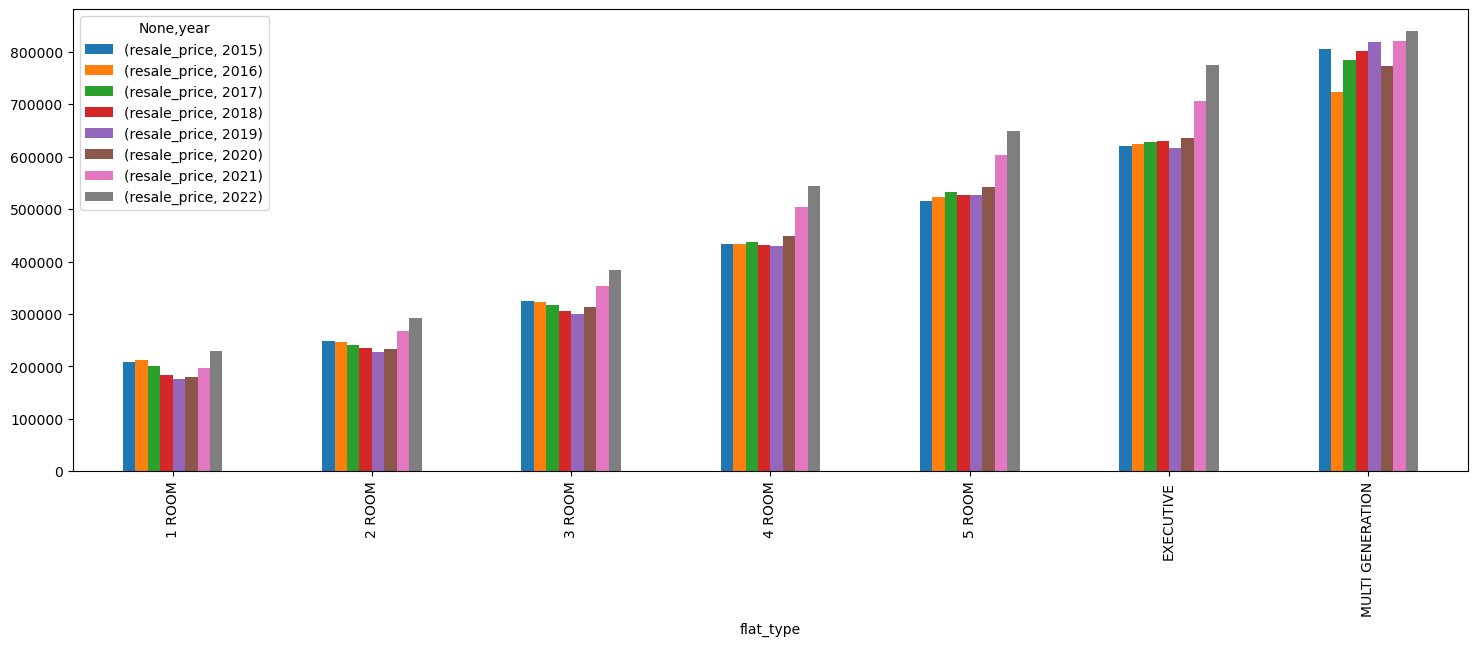

In [43]:
#using groupby and pivot to compute the mean resale price by year, flat type and resale price

group1 = hdbpricesfrom2015[["month","flat_type","resale_price"]]
group1["year"] = hdbpricesfrom2015["month"].dt.year # convert datetime to year
group2 = group1.groupby(["year","flat_type"],as_index=False).mean()

# using pivot to reorganise group1 into pivot table
group3 = group2.pivot(index="flat_type",columns="year")
group3.plot(kind="bar", figsize=(18,6))

From the bar chart of yearly resale price by flat type, trend shows increasing resale prices across all flat types. <br>

For 1 room flat to 3 room flat - Resale price from 2015 to 2019 generally decreases, and from 2021, the resale price rises again. <br>

For 4 room flat to 5 room flat - Resale price from 2015 to 2017 increases, then from 2018 to 2019 decreses before rising again from 2020. red to year 2017. In 2020, the resale price overtakes that of year 2017. <br>

For executive flat - Resale price increases from 2015 to 2018. In year 2019, the resale price went down and from 2020 it went up again. <br>

For multi generation flat - Resale price fluctuates from 2015 to 2021, and in 2022, the resale price went up.

In [44]:
#using groupby to compute the mean resale price by town, flat Type

group4 = hdbpricesfrom2015[["town","flat_type","resale_price"]]
group5 = group4.groupby(["town","flat_type"],as_index=False).mean() # Mean Resale Price

# using pivot to reorganise group1 into pivot table
group6 = group5.pivot(index="town",columns="flat_type")
display(group6)

resale_price                                               \
flat_type             1 ROOM         2 ROOM         3 ROOM         4 ROOM   
town                                                                        
ANG MO KIO               NaN  227563.175573  316769.875000  486953.910506   
BEDOK                    NaN  234184.410072  308795.704037  451419.438914   
BISHAN                   NaN            NaN  366453.365854  567900.566057   
BUKIT BATOK              NaN            NaN  285050.506058  405747.217571   
BUKIT MERAH         196432.4  258890.497696  392142.196005  665115.072505   
BUKIT PANJANG            NaN  255443.835052  308589.396419  407088.036323   
BUKIT TIMAH              NaN            NaN  411423.600000  636572.385965   
CENTRAL AREA             NaN  264333.361702  423731.830221  776167.377676   
CHOA CHU KANG            NaN  246831.147541  316018.437134  388052.118153   
CLEMENTI                 NaN  314799.333333  350129.732570  582698.507289   
GEYLANG                  NaN  214380.243243  301407.948627  538357.279923   
HOUGANG                  NaN  244909.803922  311058.101370  422314.725164   
JURONG EAST              NaN  247236.345455  303532.982567  422457.111514   
JURONG WEST              NaN  239258.933333  281593.461739  391570.569102   
KALLANG/WHAMPOA          NaN  241227.586207  363369.769890  604553.495951   
MARINE PARADE            NaN  222000.000000  391354.137795  512629.288889   
PASIR RIS                NaN  279774.193548  383860.721739  441015.877003   
PUNGGOL                  NaN  264271.897196  377450.233276  473171.716620   
QUEENSTOWN               NaN  255115.107692  385990.717629  724266.056491   
SEMBAWANG                NaN  248658.760000  327910.503817  377233.231588   
SENGKANG                 NaN  267391.477612  363882.478360  444355.030363   
SERANGOON                NaN  233639.294118  326614.001340  471601.441489   
TAMPINES                 NaN  277383.870968  345217.949503  456125.060715   
TOA PAYOH                NaN  221577.267081  306014.671218  584055.921194   
WOODLANDS                NaN  237092.390244  281873.349782  366504.445285   
YISHUN                   NaN  244678.696970  298123.262356  384468.886902   

                                                               
flat_type               5 ROOM     EXECUTIVE MULTI GENERATION  
town                                                           
ANG MO KIO       690610.079393  8.380602e+05              NaN  
BEDOK            594538.661227  7.371765e+05              NaN  
BISHAN           779765.091714  9.242902e+05    899574.000000  
BUKIT BATOK      563452.795587  6.517413e+05              NaN  
BUKIT MERAH      782746.769357  7.856667e+05              NaN  
BUKIT PANJANG    508861.300560  6.189098e+05              NaN  
BUKIT TIMAH      833626.951456  9.806643e+05              NaN  
CENTRAL AREA     983582.099839           NaN              NaN  
CHOA CHU KANG    464723.792384  5.682018e+05              NaN  
CLEMENTI         742734.922619  8.326340e+05              NaN  
GEYLANG          695340.753199  7.649519e+05              NaN  
HOUGANG          544304.704426  6.983136e+05              NaN  
JURONG EAST      541372.872080  7.008942e+05              NaN  
JURONG WEST      468549.112802  5.713997e+05              NaN  
KALLANG/WHAMPOA  750418.637804  8.077159e+05              NaN  
MARINE PARADE    811054.172297           NaN              NaN  
PASIR RIS        517208.147211  6.481329e+05              NaN  
PUNGGOL          526412.469019  5.649929e+05              NaN  
QUEENSTOWN       865562.541792  1.009450e+06              NaN  
SEMBAWANG        436884.866356  5.073540e+05              NaN  
SENGKANG         499565.123595  5.811459e+05              NaN  
SERANGOON        588088.255354  7.664007e+05              NaN  
TAMPINES         568879.524125  7.063433e+05    805821.217391  
TOA PAYOH        778728.434286  8.235379e+05              NaN  
WOODLANDS        440720.640449  6.328175e+05          

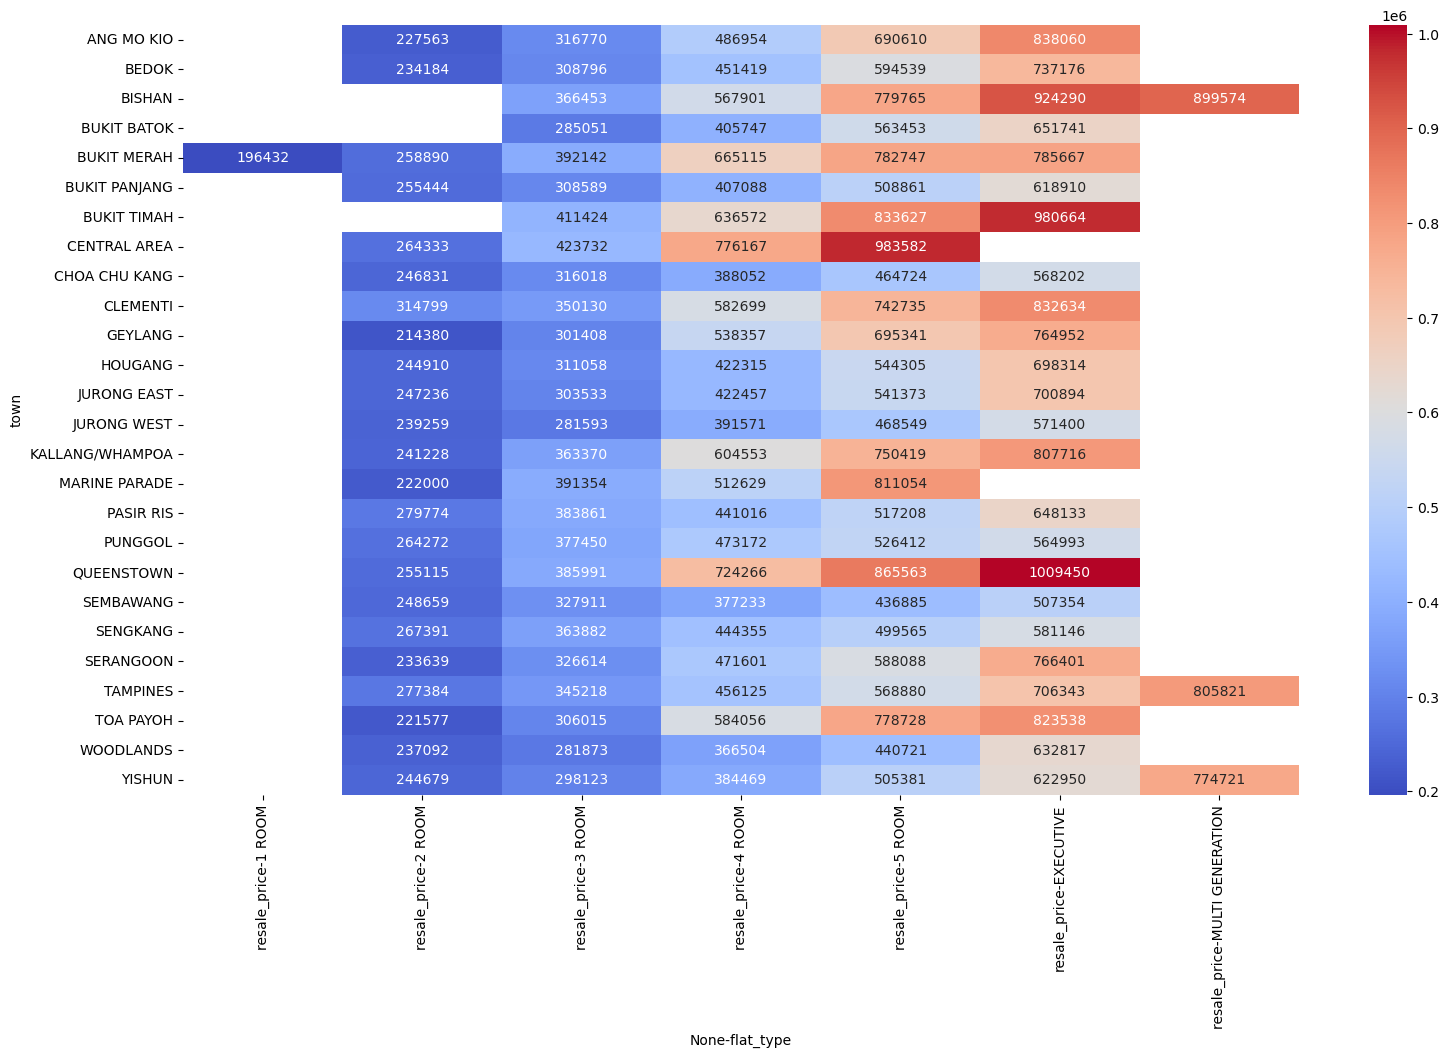

In [45]:
# using heat map to show the mean resale price by town and flat Type

plt.figure(figsize=(18, 10))
sns.heatmap(group6, cmap="coolwarm",annot=True, fmt="0.0f")
plt.show()

As per the above heat map, mean resale price is getting higher moving from 1 room(smallest flat) to executive flat (biggest flat).<br>
The highest mean resale price is an executive Flat located in Queenstown and the lowest mean resale price is a 1 room flat in Bukit Merah. <br>
Flats located at Bishan, Bukit Merah, Bukit Timah, Central, Queenstown, Toa Payoh are more expensive. <br>
For 4 room flat which is the popular choice, the mean resale price is highest in central area, Bukit Merah and Queenstown.
For 5 room flat, central area has the highest mean resale price among the 26 towns. <br>
For executive flat, Queenstown has the highest mean resale price, followed by Bukit Timah and Bishan respectively. <br>
Multi generation flats are located in Bishan, Tampines and Yishun and have the highest reselling price in their respective towns.



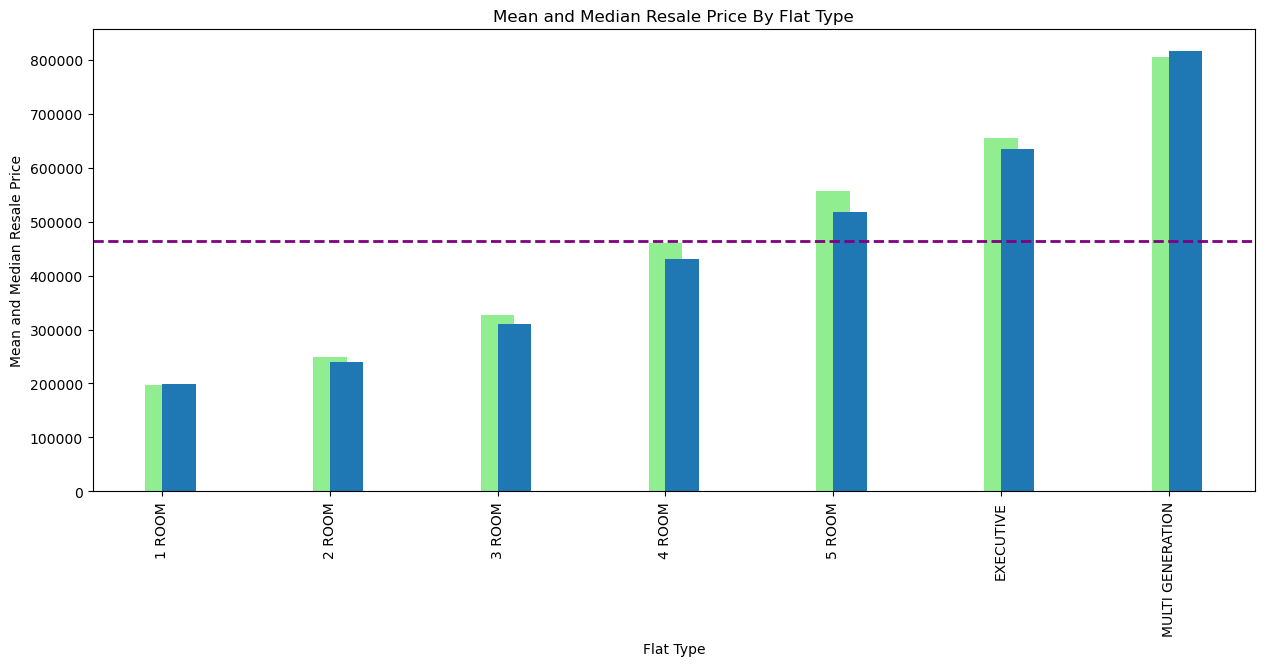

In [46]:
# using bar chart to show the mean and median resale price by flat type

flattypemean = group1.groupby(["flat_type"],as_index=False).mean() # computing mean resale price by flat type
flattypemedian = group1.groupby(["flat_type"],as_index=False).median() # computing median resale price by flat type

plt.figure(figsize=(15, 6))
plt.title("Mean and Median Resale Price By Flat Type")

overall_mean = group1["resale_price"].mean()

plt.bar(x=flattypemean["flat_type"], height=flattypemean["resale_price"], width = 0.2, align="center", color = "lightgreen")
plt.bar(x=flattypemedian["flat_type"], height=flattypemedian["resale_price"],width = 0.2, align="edge")
plt.axhline(overall_mean, color='purple', linewidth=2, linestyle="--") # showing nation-wide mean resale price
plt.xlabel("Flat Type")
plt.ylabel("Mean and Median Resale Price")
plt.xticks(rotation=90)
plt.show()

From the above bar chart, purple dotted line represents the Singapore wide resale price mean. Mean resale price by flat type is represented in blue color. Multi generation flat has the highest mean resale price and 1 room flat has the lowest mean resale price. <br>
The median resale price by flat type is shown in orange color. Multi generation flat similarly has the highest median resale price and 1 room flat also has the lowest median resale price.


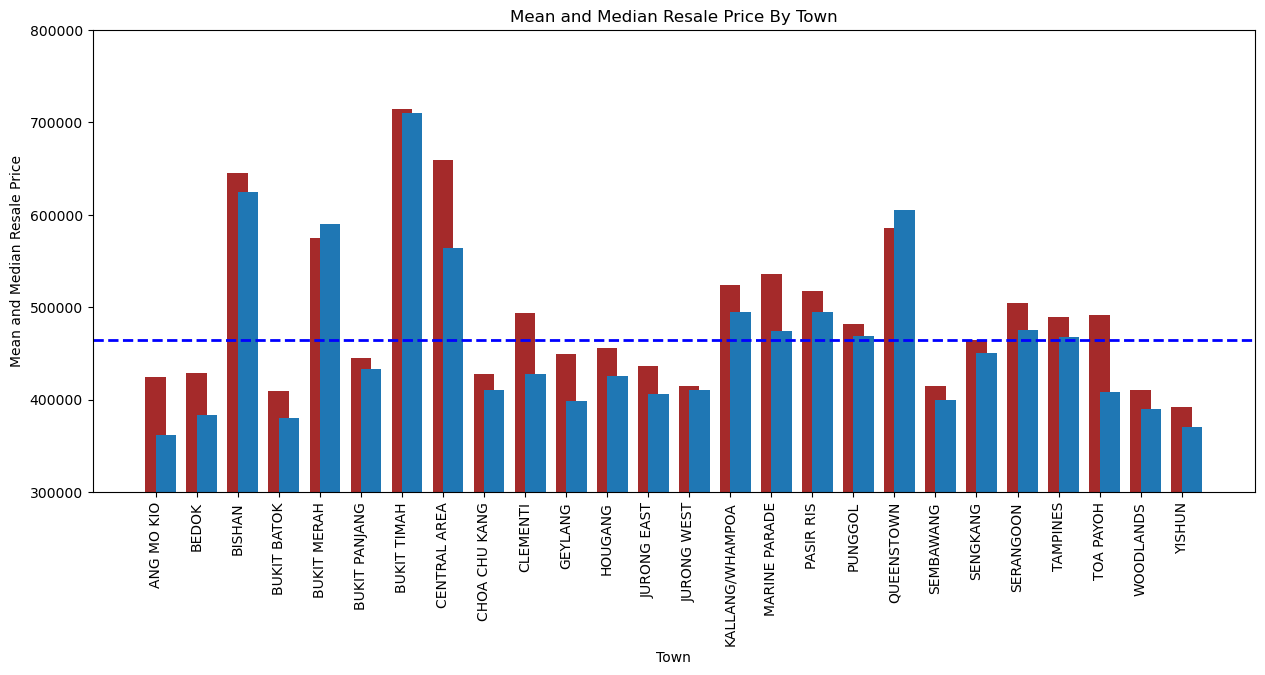

In [47]:
# using bar chart to show the mean and median resale price by town  

townmean = hdbpricesfrom2015.groupby(["town"],as_index=False).mean() # compute Mean Resale Price by Town
townmedian = hdbpricesfrom2015.groupby(["town"],as_index=False).median() # compute Median Resale Price by Town
                            
plt.figure(figsize=(15, 6))
plt.title("Mean and Median Resale Price By Town")

plt.bar(x=townmean["town"], height=townmean["resale_price"], width = 0.5, align="center", color = "brown")
plt.bar(x=townmedian["town"], height=townmedian["resale_price"],width = 0.5, align="edge")
plt.axhline(overall_mean, color='blue', linewidth=2, linestyle="--", label="nation-wide mean") # showing mean resale price islandwide

plt.xlabel("Town")
plt.ylabel("Mean and Median Resale Price")
plt.xticks(rotation=90)
plt.ylim(ymax = 800000, ymin=300000)
plt.show()

Blue dotted line represents the Singapore wide resale price mean. Above the line means more expensive than the mean price and <br>
below the line means cheaper than the Nation-wide Resale price mean. This helps buyers to decide which town that match their budget. <br>

Mean resale price by town is represented in brown color - Bukit Timah has the highest mean resale price and Yishun has the lowest resale price.
Bishan, Bukit Merah, Bukit Timah, Central Area and Queenstown have higher mean resale price compared to other towns. <br>
Median resale price by town is represented in blue color - Bukit Timah has the highest median resale price and Yishun has the lowest median resale price.

It is notable that, when comparing mean and median resale price, the highest price difference of over $100K is at Central area compared to other towns, likely due to the ‘million dollar’ resale flats.


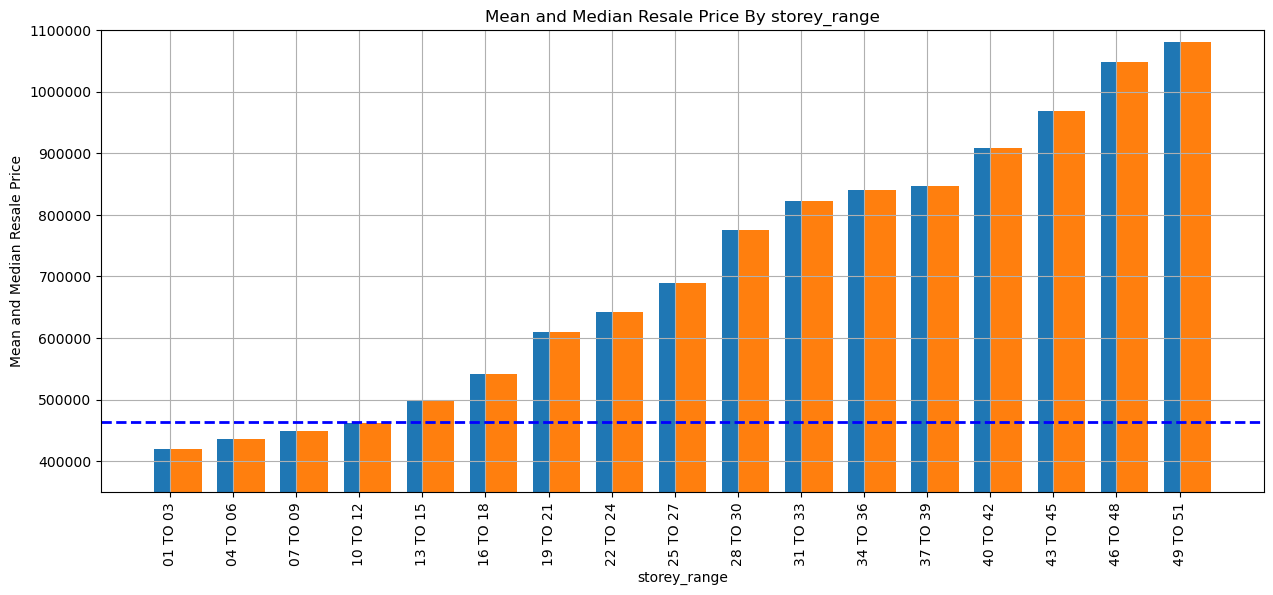

In [48]:
storeyrange = hdbpricesfrom2015[["storey_range","resale_price"]] 

storeyrangemean = hdbpricesfrom2015.groupby(["storey_range"],as_index=False).mean() # compute Mean Resale Price by storey range
storeyrangemedian = hdbpricesfrom2015.groupby(["storey_range"],as_index=False).median() # compute Median Resale Price by storey range

overall_mean1 = hdbpricesfrom2015["resale_price"].mean()
                        
plt.figure(figsize=(15, 6))
plt.title("Mean and Median Resale Price By storey_range")
                        
plt.bar(x=storeyrangemean["storey_range"], height=storeyrangemean["resale_price"], width = 0.5, align="center")
plt.bar(x=storeyrangemean["storey_range"], height=storeyrangemean["resale_price"],width = 0.5,align="edge")
plt.axhline(overall_mean1, color='blue', linewidth=2, linestyle="--") # showing mean resale price islandwide

plt.xlabel("storey_range")
plt.ylabel("Mean and Median Resale Price")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.ylim(ymax = 1100000, ymin=350000)
plt.show()

Comparing the different storey range mean to island-wide resale price mean in the above chart, there is huge difference from island wide resale price mean for storey range 25 and above.
It may be possible that due to their bigger size, resale price is higher. Also the location of such flats may be central region.


<AxesSubplot:xlabel='lease_commence_date', ylabel='count'>

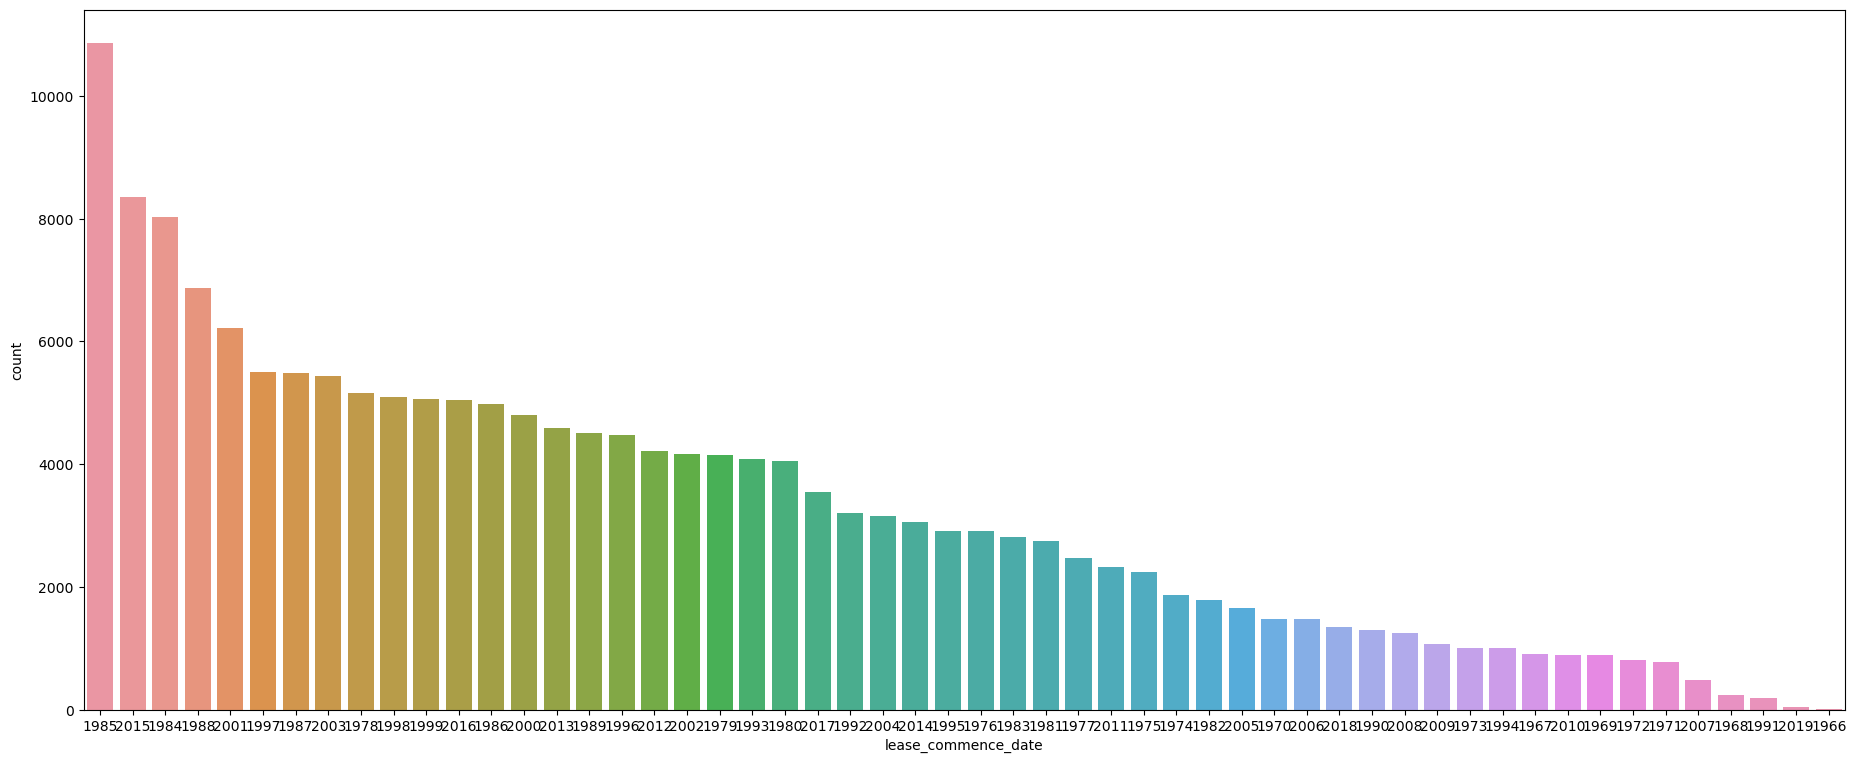

In [49]:
fig = plt.figure(figsize=(50,20))
fig.add_subplot(2,2,1)
large_to_small = hdbpricesfrom2015.groupby("lease_commence_date").size().sort_values().index[::-1]
sns.countplot(x = hdbpricesfrom2015["lease_commence_date"], order=large_to_small)

From the above chart, the resale flats sold per lease commence date fluctuates. The top 2 highest number of resale flats sold have their lease commence dates in years 1985 and 2015. The latter could possibly because a lot of flats reached their MOP.
The lowest number of resale flats were sold in 1966 and 2019.

In [50]:
Corr = hdbpricesfrom2015.corr()
Corr

floor_area_sqm  lease_commence_date  remaining_lease  \
floor_area_sqm             1.000000             0.185338         0.188626   
lease_commence_date        0.185338             1.000000         0.987487   
remaining_lease            0.188626             0.987487         1.000000   
resale_price               0.620889             0.364627         0.338519   

                     resale_price  
floor_area_sqm           0.620889  
lease_commence_date      0.364627  
remaining_lease          0.338519  
resale_price             1.000000

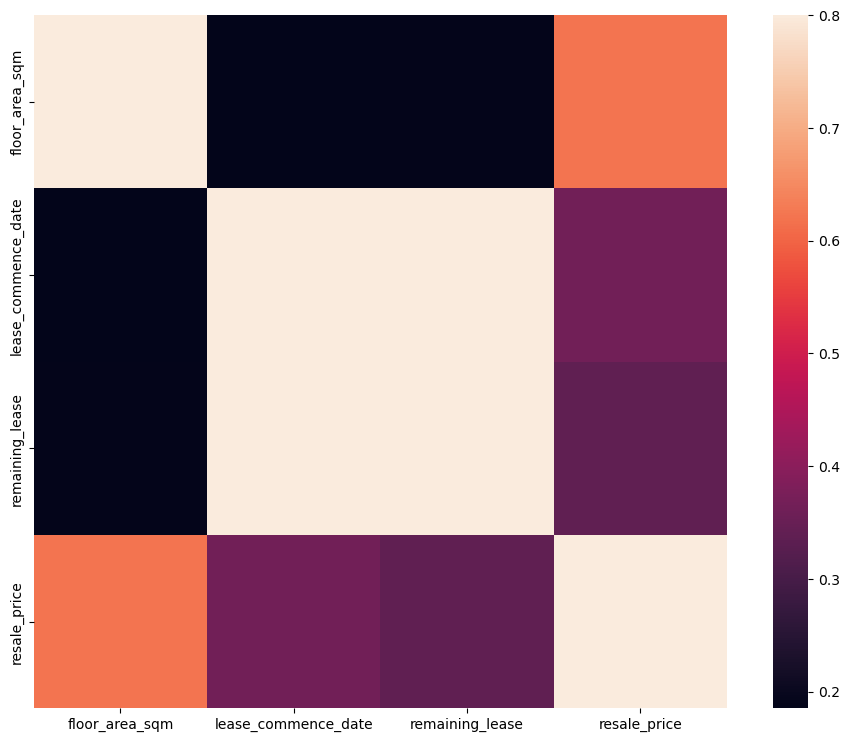

In [51]:
#correlation matrix
corr = hdbpricesfrom2015.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True, fmt="d");

In [52]:
towndict = {}

for i, town in enumerate(hdbpricesfrom2015.town.unique()):
    towndict[town] = i
    
print(towndict)

{'ANG MO KIO': 0, 'BEDOK': 1, 'BISHAN': 2, 'BUKIT BATOK': 3, 'BUKIT MERAH': 4, 'BUKIT PANJANG': 5, 'BUKIT TIMAH': 6, 'CENTRAL AREA': 7, 'CHOA CHU KANG': 8, 'CLEMENTI': 9, 'GEYLANG': 10, 'HOUGANG': 11, 'JURONG EAST': 12, 'JURONG WEST': 13, 'KALLANG/WHAMPOA': 14, 'MARINE PARADE': 15, 'PASIR RIS': 16, 'PUNGGOL': 17, 'QUEENSTOWN': 18, 'SEMBAWANG': 19, 'SENGKANG': 20, 'SERANGOON': 21, 'TAMPINES': 22, 'TOA PAYOH': 23, 'WOODLANDS': 24, 'YISHUN': 25}


In [53]:
# treating variables with more than 2 Classes
# enumerate() method adds a counter to an iterable and returns it in a form of enumerating object. 
# enumerated object can then be used directly for loops or converted into a list of tuples using the list() method.

monthdict = {}
towndict = {}
flattypedict = {}
blockdict = {}
streetnamedict = {}
storeydict = {}
flatmodeldict = {}
#array that stores all dicts to change categorical into bins
alldicts = [monthdict, towndict, flattypedict, blockdict, streetnamedict, storeydict, flatmodeldict]
#column names that need to convert from category to value
colnames = ["month","town","flat_type","block","street_name","storey_range","flat_model"]
print(colnames)

#as alldicts[n] is the dictionary for colnames[n], we can zip them up
for pair in zip(alldicts,colnames):
    #pair[1] is particular column name, get all unique terms in that column
    #save each value as a key with a number pair
    for i, value in enumerate(hdbpricesfrom2015[pair[1]].unique()):
        pair[0][value] = i

print(flattypedict)
print(storeydict)
#print(flatmodeldict)

['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
{'3 ROOM': 0, '4 ROOM': 1, '5 ROOM': 2, '2 ROOM': 3, 'EXECUTIVE': 4, '1 ROOM': 5, 'MULTI GENERATION': 6}
{'07 TO 09': 0, '01 TO 03': 1, '13 TO 15': 2, '10 TO 12': 3, '04 TO 06': 4, '19 TO 21': 5, '16 TO 18': 6, '22 TO 24': 7, '25 TO 27': 8, '28 TO 30': 9, '34 TO 36': 10, '46 TO 48': 11, '31 TO 33': 12, '37 TO 39': 13, '43 TO 45': 14, '40 TO 42': 15, '49 TO 51': 16}


In [54]:
#Converting all categorial values into number bins

for pair in zip(alldicts,colnames):
    hdbpricesfrom2015[pair[1]] = hdbpricesfrom2015[pair[1]].replace(pair[0])

In [55]:
hdbpricesfrom2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172960 entries, 0 to 172959
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                172960 non-null  int64  
 1   town                 172960 non-null  int64  
 2   flat_type            172960 non-null  int64  
 3   block                172960 non-null  int64  
 4   street_name          172960 non-null  int64  
 5   storey_range         172960 non-null  int64  
 6   floor_area_sqm       172960 non-null  float64
 7   flat_model           172960 non-null  int64  
 8   lease_commence_date  172960 non-null  int64  
 9   remaining_lease      172960 non-null  float64
 10  resale_price         172960 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 14.5 MB


In [56]:
Corr = hdbpricesfrom2015.corr()
Corr

month      town  flat_type     block  street_name  \
month                1.000000  0.029445   0.026424  0.192756     0.109638   
town                 0.029445  1.000000   0.105091  0.225292     0.746319   
flat_type            0.026424  0.105091   1.000000  0.074197     0.068732   
block                0.192756  0.225292   0.074197  1.000000     0.327850   
street_name          0.109638  0.746319   0.068732  0.327850     1.000000   
storey_range         0.035954 -0.040785   0.009375  0.062604     0.017271   
floor_area_sqm       0.007841  0.107088   0.827577  0.026127     0.062745   
flat_model           0.034928  0.093974   0.355540  0.143972     0.125633   
lease_commence_date  0.181527  0.228313   0.207547  0.624340     0.329471   
remaining_lease      0.026323  0.227720   0.207709  0.603984     0.317478   
resale_price         0.197471 -0.044187   0.548893  0.143244     0.073118   

                     storey_range  floor_area_sqm  flat_model  \
month                    0.035954        0.007841    0.034928   
town                    -0.040785        0.107088    0.093974   
flat_type                0.009375        0.827577    0.355540   
block                    0.062604        0.026127    0.143972   
street_name              0.017271        0.062745    0.125633   
storey_range             1.000000       -0.002372    0.076691   
floor_area_sqm          -0.002372        1.000000    0.270762   
flat_model               0.076691        0.270762    1.000000   
lease_commence_date      0.178967        0.185338    0.272971   
remaining_lease          0.175637        0.188626    0.272079   
resale_price             0.266863        0.620889    0.346163   

                     lease_commence_date  remaining_lease  resale_price  
month                           0.181527         0.026323      0.197471  
town                            0.228313         0.227720     -0.044187  
flat_type                       0.207547         0.207709      0.548893  
block                           0.624340         0.603984      0.143244  
street_name                     0.329471         0.317478      0.073118  
storey_range                    0.178967         0.175637      0.266863  
floor_area_sqm                  0.185338         0.188626      0.620889  
flat_model                      0.272971         0.272079      0.346163  
lease_commence_date             1.000000         0.987487      0.364627  
remaining_lease                 0.987487         1.000000      0.338519  
resale_price                    0.364627         0.338519      1.000000

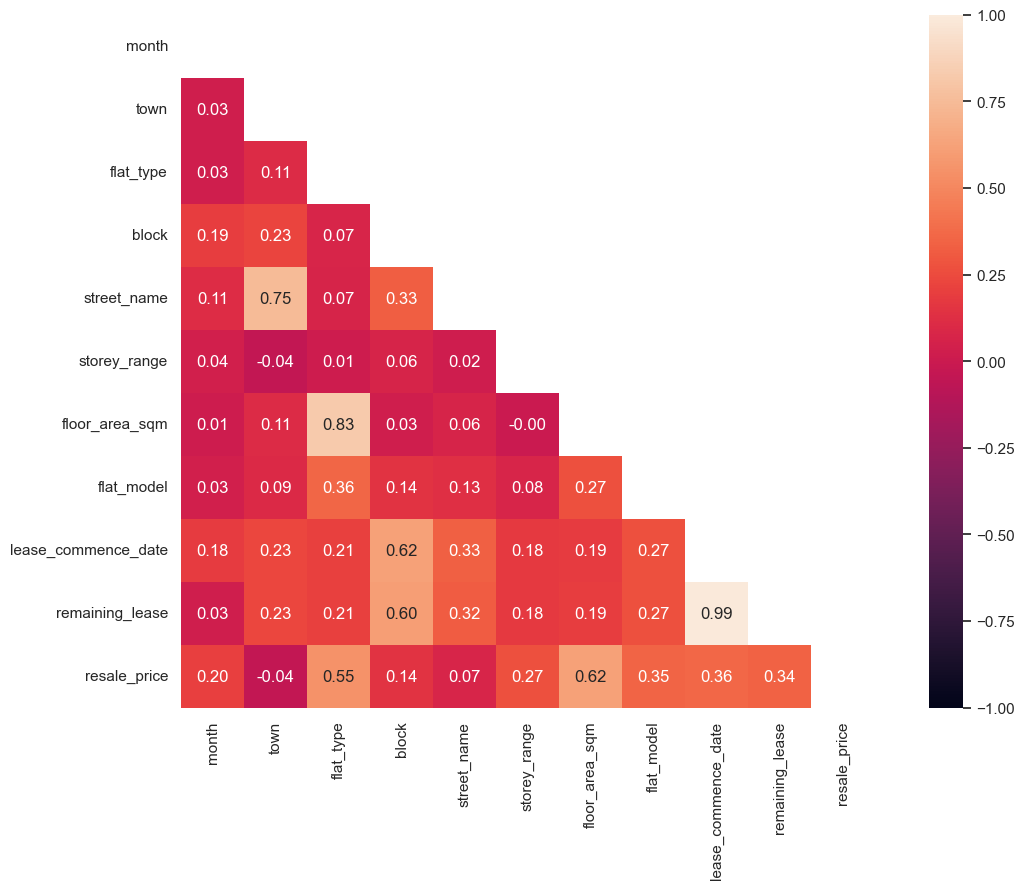

In [57]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(hdbpricesfrom2015.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(14,9))

# Plot the heatmap
_ = sns.heatmap(hdbpricesfrom2015.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap=None , vmin=-1, vmax=1, fmt='.2f') 

The correlation between the variables: <br>

Month and Resale price is 0.20 - weak correlation.<br>

Town and Resale price is -0.04 - very weak correlation.<br>

Flat type and Resale price is 0.55 - moderate correlation.<br>

Block and Resale price is 0.14 - very weak correlation.<br>

Street Name and Resale price is 0.07 - very weak correlation.<br>

Storey Range and Resale price is 0.27 - weak correlation.<br>

Floor Area in sqm  and Resale price is 0.62 - moderate correlation.<br>

Flat Model and Resale price is 0.35 - weak correlation.<br>

Lease Commence Date and Resale price is 0.36 - weak correlation.<br>

Remaining Lease and Resale price is 0.34 - weak correlation.<br>


In [58]:
hdbpricesfrom2015.sample(20)

month  town  flat_type  block  street_name  storey_range  \
171924     92     5          2   2432           88             0   
136629     77     7          0    134          442             4   
94679      56    17          4    149          237             1   
83864      51     1          1      6           10             1   
34173      21    25          1    743          372             3   
27745      18     5          1    394           86             2   
128744     73    20          1    745          269             4   
166780     89    24          2     82          356             0   
104473     61    20          1   2304          531             4   
74886      45    13          4    121          178             4   
130363     74    12          2   1442          160             5   
35178      22    17          2   2092          236             0   
32949      21     5          4     67           89             1   
76287      46     5          0    140           83             4   
10086       6    24          4    766          335             4   
84460      51    11          1   2253          529             3   
56876      35    14          1     61          207             4   
38434      25     1          1    113           14             6   
149004     82     1          1    252           10             3   
30742      19    24          4    500          358             3   

        floor_area_sqm  flat_model  lease_commence_date  remaining_lease  \
171924           113.0           0                 2016        93.333333   
136629            60.0           0                 1986        64.333333   
94679            128.0           5                 2004        83.583333   
83864             93.0           1                 1981        61.250000   
34173             96.0           2                 2012        94.000000   
27745             91.0           5                 2002        85.000000   
128744           101.0           2                 1999        77.666667   
166780           125.0           5                 2000        77.083333   
104473            92.0           5                 2015        94.500000   
74886            159.0           6                 1985        66.000000   
130363           123.0           0                 2000        78.416667   
35178            113.0           5                 2013        95.000000   
32949            142.0           6                 1999        81.000000   
76287             73.0           2                 1988        69.083333   
10086            173.0           7                 1995        78.000000   
84460             92.0           2                 2015        95.166667   
56876             92.0           1                 1984        66.000000   
38434             92.0           2                 2006        87.916667   
149004            91.0           1                 1981        58.416667   
30742            144.0           6                 1998        81.000000   

        resale_price  
171924      658000.0  
136629      452000.0  
94679       518000.0  
83864       360000.0  
34173       450000.0  
27745       338000.0  
128744      404000.0  
166780      600888.0  
104473      545000.0  
74886       580000.0  
130363      720000.0  
35178       600000.0  
32949       660000.0  
76287       265000.0  
10086       670000.0  
84460       470888.0  
56876       485000.0  
38434       598000.0  
149004      460000.0  
30742       633000.0

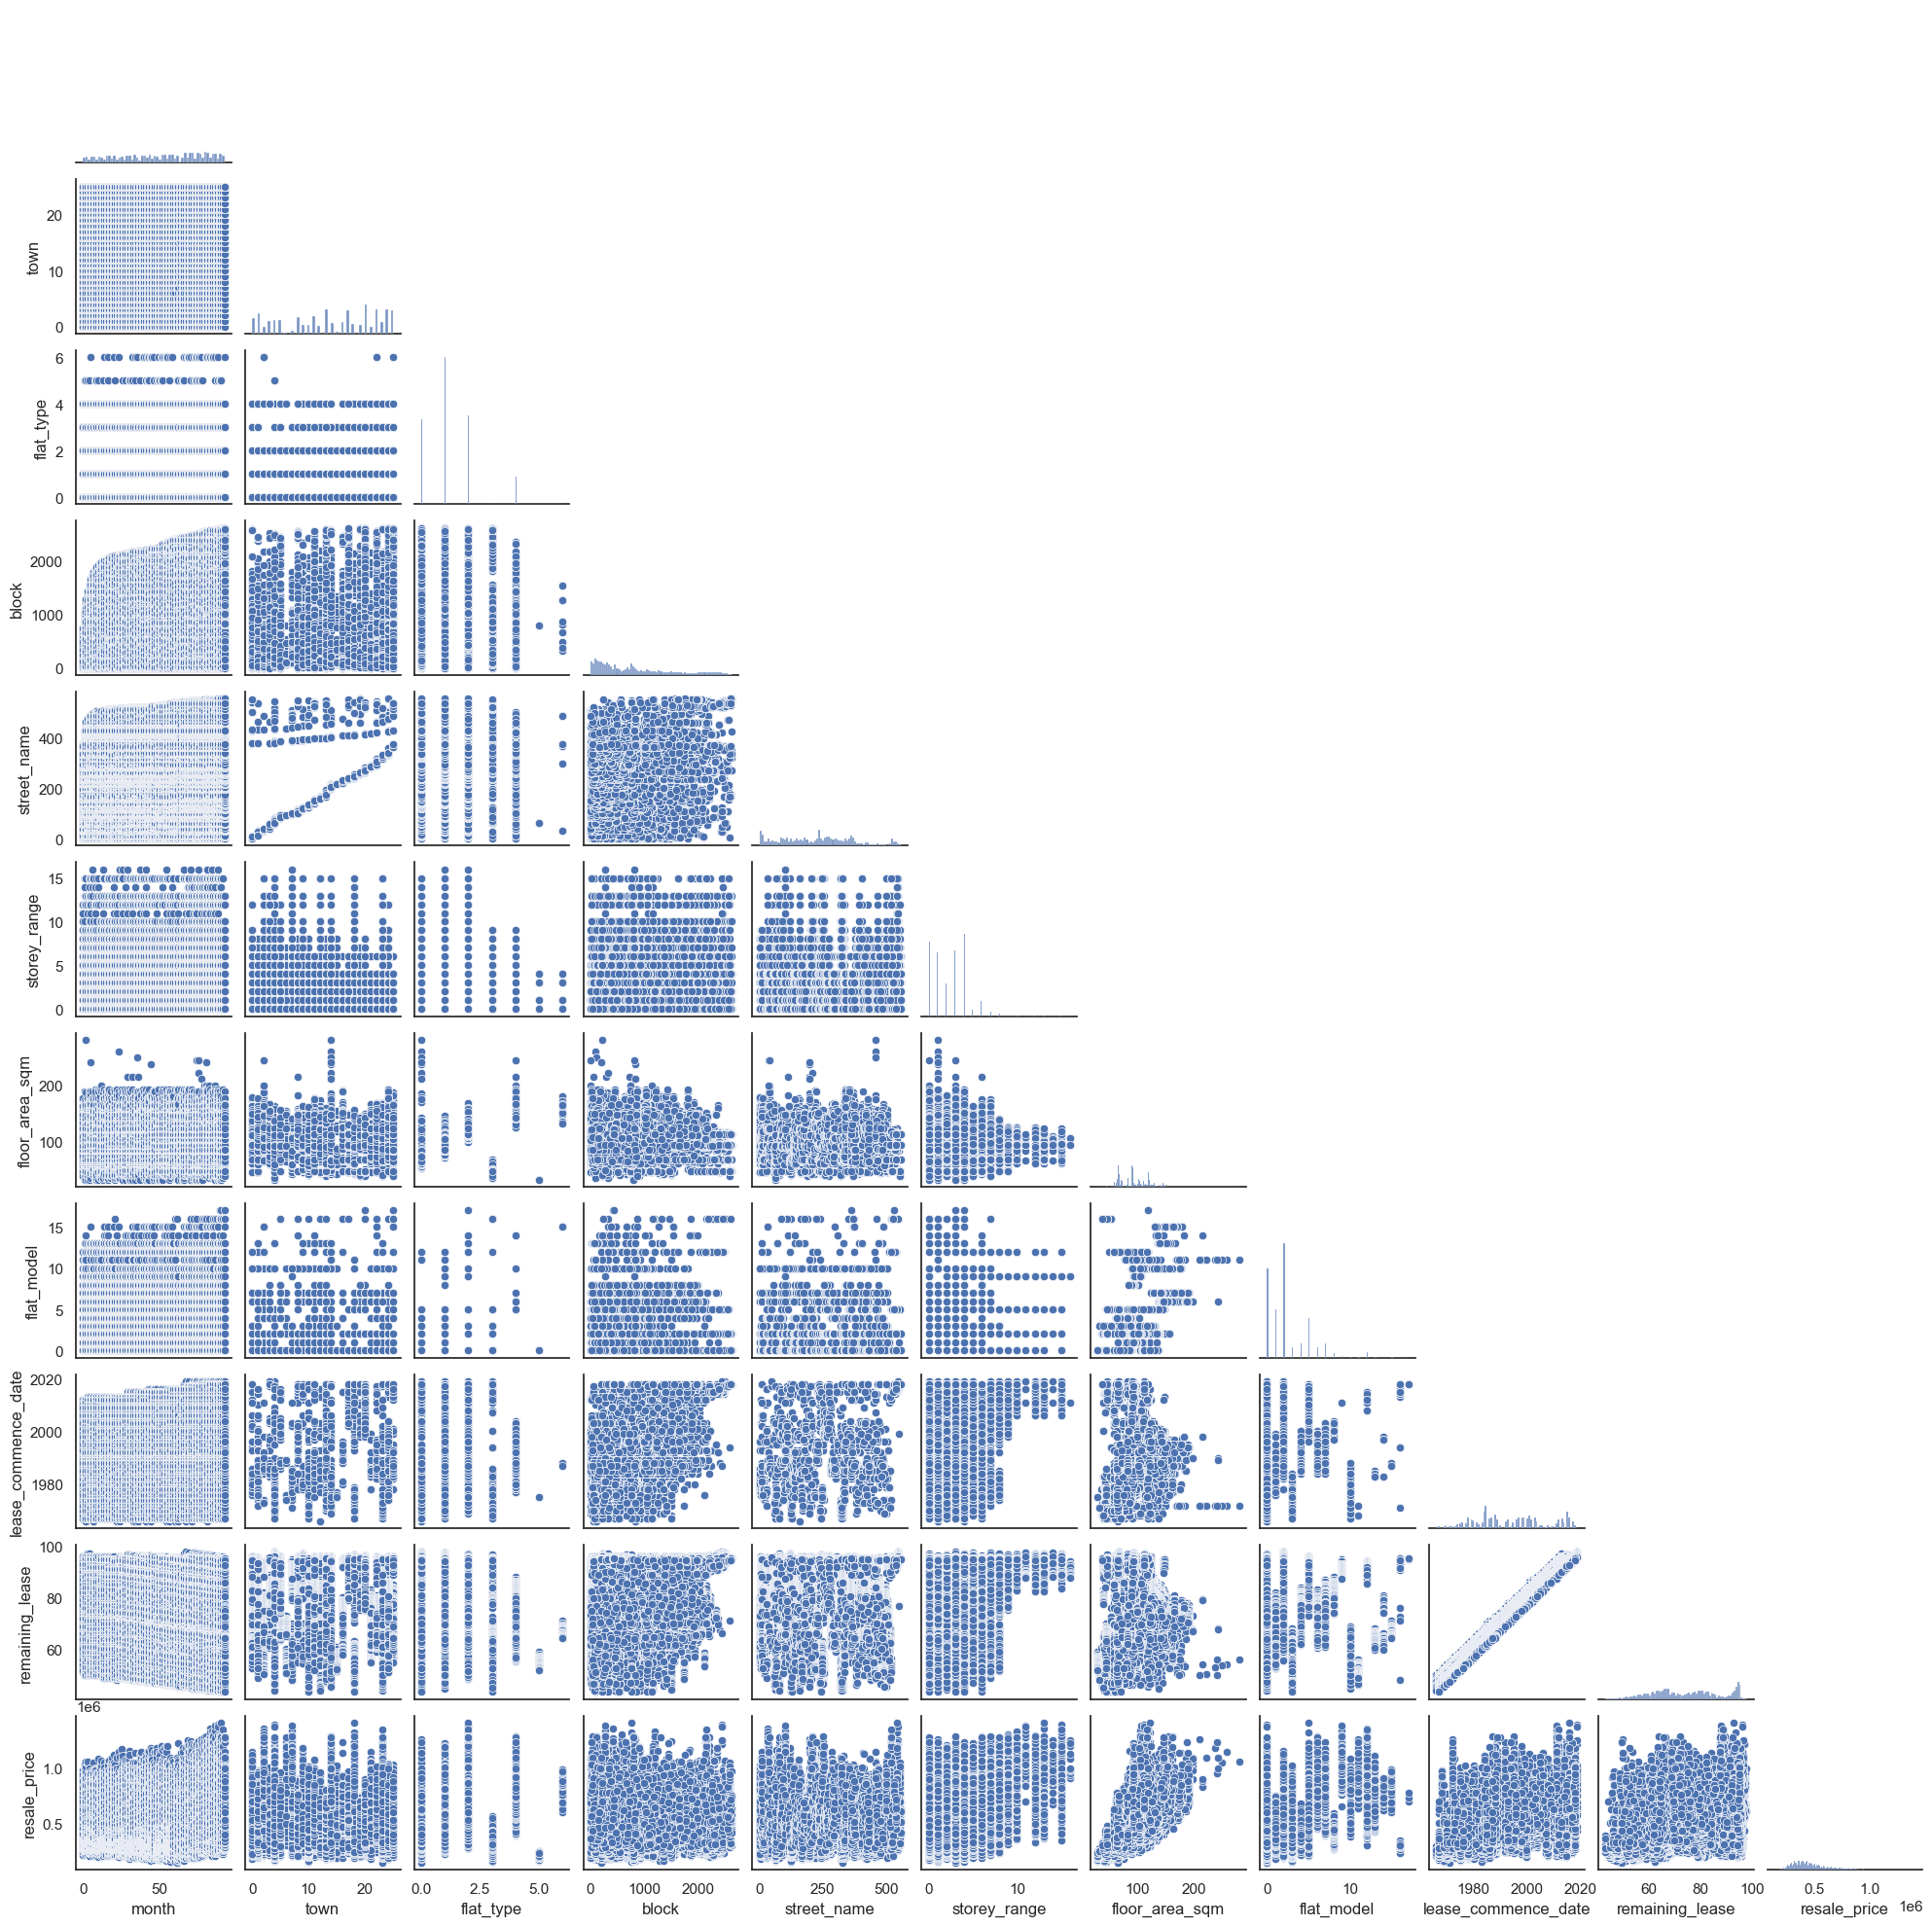

In [59]:
g = sns.pairplot(data=hdbpricesfrom2015, corner=True)
g.fig.set_size_inches(20,20)

In [60]:
#dropping columns with poor correlations (month, town, block, street_name)
#keeping lease_commence_date and dropping remaining_lease as as remaining lease = current date - lease commence date

hdbpricesfrom2015 = hdbpricesfrom2015.drop("month",axis=1)
hdbpricesfrom2015 = hdbpricesfrom2015.drop("town",axis=1)
hdbpricesfrom2015 = hdbpricesfrom2015.drop("block",axis=1)
hdbpricesfrom2015 = hdbpricesfrom2015.drop("street_name",axis=1)
hdbpricesfrom2015 = hdbpricesfrom2015.drop("remaining_lease",axis=1)

# Predictive Analysis using Machine Learning models

Model 1: Linear Regression - Linear regression models the linear relationship between the explanatory (independent) variables and response (dependent) variables.

Model 2: Random Forest - A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Model 3: K Nearest Neighbours - KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood.

Model 4:  Multi-layer Perceptron Regressor (MLPRegressor) - MLPRegressor trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.

Model 5: Tensorflow - Tensorflow sequential is the group containing the stack of linear format that consists of various layers of the library package tf.keras.Model. This Sequential class is inherited from the Module, Layer, and Model classes.

# Metrics to Understand Regression Models:

The essential step in any machine learning model is to evaluate the accuracy of the model. The Mean Squared Error, Mean absolute error, Root Mean Squared Error, and R-Squared or Coefficient of determination metrics are used to evaluate the performance of the model in regression analysis.

Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of Coefficient of Determination or R square is considered desirable.

In [61]:
from sklearn.preprocessing import LabelEncoder #MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [62]:
X1 = hdbpricesfrom2015.drop('resale_price',axis =1).values
y1 = hdbpricesfrom2015['resale_price'].values

#splitting Train and Test 
X1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=22)


In [63]:
# Choosing the features (flattype, storeyrange, floorarea, flatmodel, leasecommencementdate) correlated against resale value
firstmodel = LinearRegression()
firstmodel.fit(X1_train, y1_train)

LinearRegression()

In [64]:
#evaluating the model (intercept and slope)
print(firstmodel.intercept_)
print(firstmodel.coef_)

-4388179.395078041
[ 2652.9871704  16806.20529531  3537.41753011  7928.12228159
  2227.48090637]


In [65]:
y1_pred = firstmodel.predict(x1_test)

In [66]:
compare_df1 = pd.DataFrame({"Desired Output (Actuals)": y1_test,"Predicted Output": y1_pred})
compare_df1

Desired Output (Actuals)  Predicted Output
0                      375000.0     348958.827101
1                      445000.0     502647.482199
2                      310000.0     271029.203661
3                      260000.0     250566.133507
4                      480000.0     417524.849680
...                         ...               ...
34587                  450000.0     423253.662027
34588                  515000.0     493381.828159
34589                  781000.0     637064.253909
34590                  528000.0     452338.276257
34591                  270000.0     329937.755698

[34592 rows x 2 columns]

In [67]:
# evaluating the performance (MAE - MSE - RMSE - COD)

print("MAE:", metrics.mean_absolute_error(y1_test, y1_pred))  
print("MSE:", metrics.mean_squared_error(y1_test, y1_pred))  
print("RMSE:", np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("R square:", metrics.r2_score(y1_test, y1_pred))

MAE: 83406.82191079583
MSE: 12165856904.140312
RMSE: 110298.94335006257
R square: 0.5162922111046631


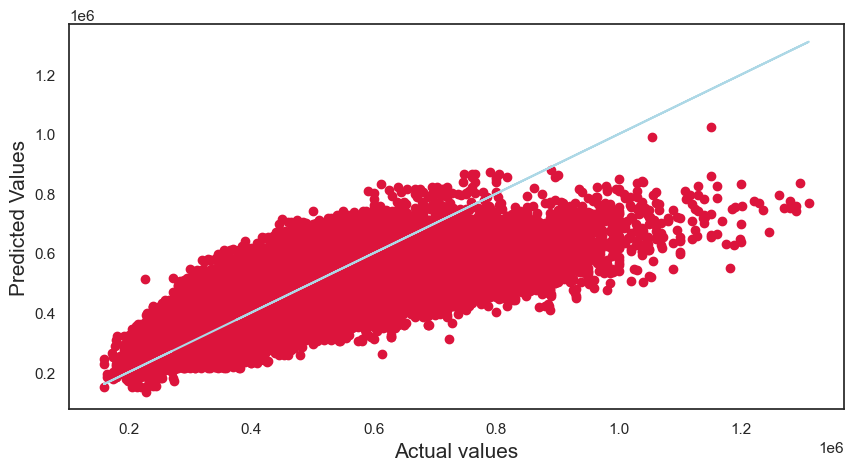

In [68]:
#visualising the prediction

fig = plt.figure(figsize=(10,5))
plt.scatter(y1_test, y1_pred, c="crimson")
plt.xlabel("Actual values", fontsize=15)
plt.ylabel("Predicted Values", fontsize=15)
# Perfect predictions
plt.plot(y1_test,y1_test,"r", c= "lightblue")


In [69]:
y2=hdbpricesfrom2015['resale_price']
y2=np.array(list(hdbpricesfrom2015["resale_price"])).reshape(-1,1)
X2=hdbpricesfrom2015.drop(columns=['resale_price'])
print(X2.shape)
print(y2.shape)

X2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=22)

secondmodel = RandomForestRegressor(max_depth=40, random_state=22, n_estimators=200)
secondmodel.fit(X2_train,y2_train)

print(X2_train.describe ())

(172960, 5)
(172960, 1)
           flat_type   storey_range  floor_area_sqm     flat_model  \
count  138368.000000  138368.000000   138368.000000  138368.000000   
mean        1.276798       2.503079       97.648414       2.427895   
std         1.092539       2.116694       24.115882       2.514072   
min         0.000000       0.000000       31.000000       0.000000   
25%         1.000000       1.000000       82.000000       0.000000   
50%         1.000000       3.000000       95.000000       2.000000   
75%         2.000000       4.000000      113.000000       4.000000   
max         6.000000      16.000000      280.000000      17.000000   

       lease_commence_date  
count        138368.000000  
mean           1994.391174  
std              13.195190  
min            1966.000000  
25%            1984.000000  
50%            1994.000000  
75%            2003.000000  
max            2019.000000  


In [70]:
y2_pred = secondmodel.predict(x2_test)
y2_pred

array([381590.28824062, 429162.34848485, 265690.29761905, ...,
       783174.57406941, 474471.3918402 , 309427.39263574])

In [71]:
# to deal with error: Data must be 1-dimensional
# np.ravel() returns a contiguous flattened array and can be used to change 2D arrays to 1D arrays.
# df= pd.DataFrame ({'X':X.ravel(),'Y':Y.ravel()}, index=range(1,8))

compare_df2 = pd.DataFrame({"Desired Output (Actuals)":y2_test.ravel(),"Predicted Output":y2_pred.ravel()})
compare_df2

Desired Output (Actuals)  Predicted Output
0                      375000.0     381590.288241
1                      445000.0     429162.348485
2                      310000.0     265690.297619
3                      260000.0     280826.870714
4                      480000.0     425289.283317
...                         ...               ...
34587                  450000.0     408659.106514
34588                  515000.0     435471.921610
34589                  781000.0     783174.574069
34590                  528000.0     474471.391840
34591                  270000.0     309427.392636

[34592 rows x 2 columns]

In [72]:
# evaluating the performance (MAE - MSE - RMSE - COD)

print("MAE:", metrics.mean_absolute_error(y2_test, y2_pred))  
print("MSE:", metrics.mean_squared_error(y2_test, y2_pred))  
print("RMSE:", np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print("R square:", metrics.r2_score(y2_test, y2_pred))

MAE: 52786.8663710944
MSE: 5634370437.890307
RMSE: 75062.44359125479
R square: 0.7759805258434643


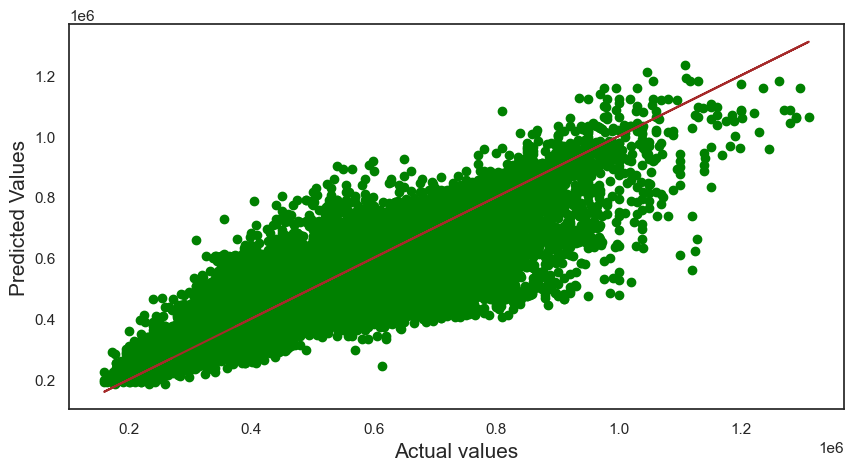

In [73]:
#visualising the prediction

fig = plt.figure(figsize=(10,5))
plt.scatter(y2_test, y2_pred, c="green")
plt.xlabel("Actual values", fontsize=15)
plt.ylabel("Predicted Values", fontsize=15)
# Perfect predictions
plt.plot(y2_test,y2_test,'r', c= "brown")

In [74]:
y3=hdbpricesfrom2015['resale_price']
y3=np.array(list(hdbpricesfrom2015["resale_price"])).reshape(-1,1)
X3=hdbpricesfrom2015.drop(columns=['resale_price'])
print(X3.shape)
print(y3.shape)

X3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=22)

#thirdmodel = knn(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#brute force approach is the most basic approach. Using brute force involves computing distances between all pairs of data points in the dataset. 
#If there are N samples with D dimensions, the search complexity is O[DN2]. Therefore, the brute force works well for small datasets.
thirdmodel = KNeighborsRegressor(algorithm='brute') #choosing only the algorithm as brute and leaving default values for other parameters 
thirdmodel.fit(X3_train,y3_train)


(172960, 5)
(172960, 1)


KNeighborsRegressor(algorithm='brute')

In [75]:
y3_pred = thirdmodel.predict(x3_test)
y3_pred

array([[400377.6],
       [398000. ],
       [314000. ],
       ...,
       [801200. ],
       [500600. ],
       [311400. ]])

In [76]:
compare_df3 = pd.DataFrame({"Desired Output (Actuals)":y3_test.ravel(),"Predicted Output":y3_pred.ravel()})
compare_df2

Desired Output (Actuals)  Predicted Output
0                      375000.0     381590.288241
1                      445000.0     429162.348485
2                      310000.0     265690.297619
3                      260000.0     280826.870714
4                      480000.0     425289.283317
...                         ...               ...
34587                  450000.0     408659.106514
34588                  515000.0     435471.921610
34589                  781000.0     783174.574069
34590                  528000.0     474471.391840
34591                  270000.0     309427.392636

[34592 rows x 2 columns]

In [77]:
# evaluating the performance (MAE - MSE - RMSE - COD)

print("MAE:", metrics.mean_absolute_error(y3_test, y3_pred))  
print("MSE:", metrics.mean_squared_error(y3_test, y3_pred))  
print("RMSE:", np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))
print("R square:", metrics.r2_score(y3_test, y3_pred))

MAE: 57497.9786998728
MSE: 6680508845.217653
RMSE: 81734.37982402297
R square: 0.7343866373180628


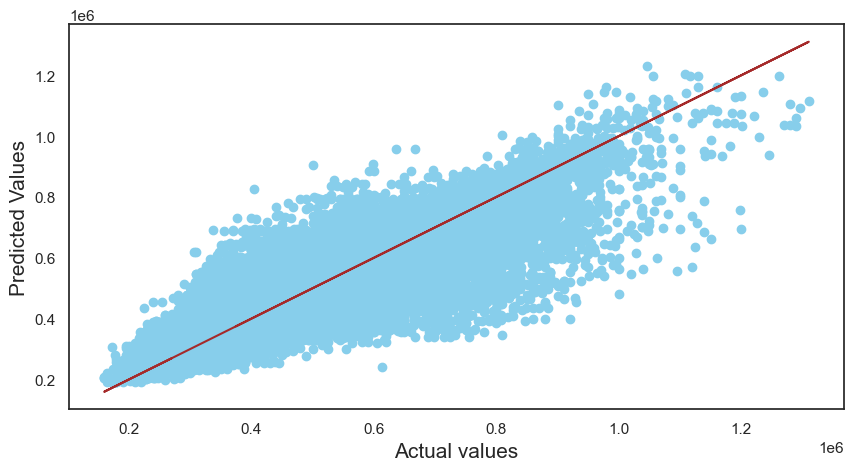

In [78]:
# visualizing the predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y3_test, y3_pred, c="skyblue")
plt.xlabel("Actual values", fontsize=15)
plt.ylabel("Predicted Values", fontsize=15)
# Perfect predictions
plt.plot(y3_test,y3_test,'r', c= "brown")

In [79]:
y4=hdbpricesfrom2015['resale_price']
y4=np.array(list(hdbpricesfrom2015["resale_price"])).reshape(-1,1)
X4=hdbpricesfrom2015.drop(columns=['resale_price'])
print(X4.shape)
print(y4.shape)

X4_train, x4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=22)

fourthmodel = MLPRegressor(hidden_layer_sizes=(50,50,50), max_iter = 1500, activation = 'relu', solver = 'adam', alpha=1e-6, random_state=22)
fourthmodel.fit(X4_train,y4_train)


(172960, 5)
(172960, 1)


MLPRegressor(alpha=1e-06, hidden_layer_sizes=(50, 50, 50), max_iter=1500,
             random_state=22)

In [80]:
y4_pred = fourthmodel.predict(x4_test)
y4_pred

array([441992.99667501, 460429.83601798, 333825.67845095, ...,
       699331.42344758, 437751.64311864, 303120.78111359])

In [81]:
compare_df4 = pd.DataFrame({"Desired Output (Actuals)":y4_test.ravel(),"Predicted Output":y4_pred.ravel()})
compare_df4

Desired Output (Actuals)  Predicted Output
0                      375000.0     441992.996675
1                      445000.0     460429.836018
2                      310000.0     333825.678451
3                      260000.0     297148.064411
4                      480000.0     447749.884281
...                         ...               ...
34587                  450000.0     426540.324105
34588                  515000.0     438200.605279
34589                  781000.0     699331.423448
34590                  528000.0     437751.643119
34591                  270000.0     303120.781114

[34592 rows x 2 columns]

In [82]:
# evaluating the performance (MAE - MSE - RMSE-COD)

print("MAE:", metrics.mean_absolute_error(y4_test, y4_pred))  
print("MSE:", metrics.mean_squared_error(y4_test, y4_pred))  
print("RMSE:", np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))
print("R square:", metrics.r2_score(y4_test, y4_pred))

MAE: 74757.69288549208
MSE: 10371293678.558786
RMSE: 101839.54869577332
R square: 0.5876430593612711


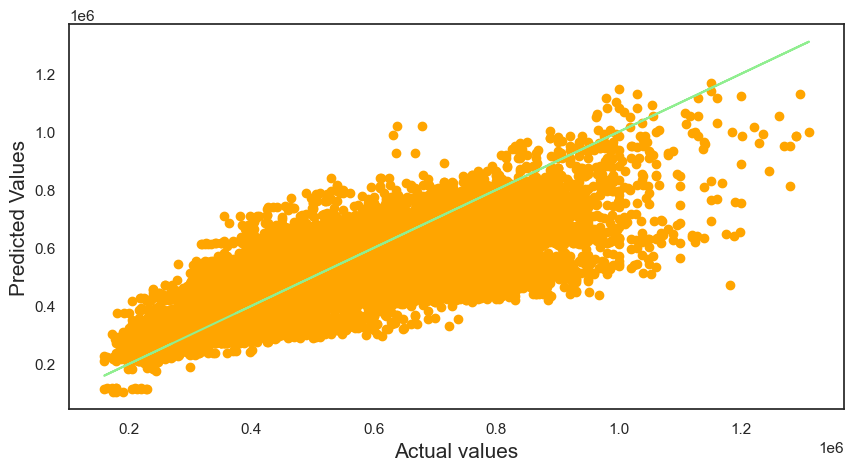

In [83]:
# visualizing the predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y4_test, y4_pred, c="orange")
plt.xlabel("Actual values", fontsize=15)
plt.ylabel("Predicted Values", fontsize=15)
# Perfect predictions
plt.plot(y4_test,y4_test,'r', c= "lightgreen")

In [84]:
y5=hdbpricesfrom2015['resale_price']
y5=np.array(list(hdbpricesfrom2015["resale_price"])).reshape(-1,1)
X5=hdbpricesfrom2015.drop(columns=['resale_price'])
print(X5.shape)
print(y5.shape)

X5_train, x5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=22)

fifthmodel = Sequential()
fifthmodel.add(Dense(5,activation='relu', input_shape= (5,)))
fifthmodel.add(Dense(5,activation='relu'))
fifthmodel.add(Dense(10,activation='relu'))
fifthmodel.add(Dense(15,activation='relu'))
fifthmodel.add(Dense(10,activation='relu'))
fifthmodel.add(Dense(5,activation='relu'))
fifthmodel.add(Dense(1))
fifthmodel.compile(optimizer='Adam',loss='mse') #loss measures how well the model did on training and then tries to improve using the Optimizer

(172960, 5)
(172960, 1)


In [85]:
his = tf.keras.callbacks.History()
fifthmodel.fit(x=X5_train,y=y5_train,
          validation_data=(x5_test,y5_test),
          batch_size=64,epochs=200, callbacks= [his])

fifthmodel.summary()

Epoch 1/200
2162/2162 [==============================] - 7s 3ms/step - loss: 47632551936.0000 - val_loss: 22597675008.0000
Epoch 2/200
2162/2162 [==============================] - 6s 3ms/step - loss: 21380349952.0000 - val_loss: 19831521280.0000
Epoch 3/200
2162/2162 [==============================] - 6s 3ms/step - loss: 16477761536.0000 - val_loss: 14293608448.0000
Epoch 4/200
2162/2162 [==============================] - 6s 3ms/step - loss: 13920777216.0000 - val_loss: 13899628544.0000
Epoch 5/200
2162/2162 [==============================] - 6s 3ms/step - loss: 13681570816.0000 - val_loss: 13619642368.0000
Epoch 6/200
2162/2162 [==============================] - 6s 3ms/step - loss: 13496788992.0000 - val_loss: 13432988672.0000
Epoch 7/200
2162/2162 [==============================] - 7s 3ms/step - loss: 13344180224.0000 - val_loss: 13395283968.0000
Epoch 8/200
2162/2162 [==============================] - 6s 3ms/step - loss: 13227106304.0000 - val_loss: 13251301376.0000
Epoch 9/200
2162

Epoch 133/200
2162/2162 [==============================] - 7s 3ms/step - loss: 12942557184.0000 - val_loss: 12934948864.0000
Epoch 134/200
2162/2162 [==============================] - 7s 3ms/step - loss: 12938952704.0000 - val_loss: 12959187968.0000
Epoch 135/200
2162/2162 [==============================] - 7s 3ms/step - loss: 12936692736.0000 - val_loss: 12931037184.0000
Epoch 136/200
2162/2162 [==============================] - 7s 3ms/step - loss: 12940930048.0000 - val_loss: 13030506496.0000
Epoch 137/200
2162/2162 [==============================] - 7s 3ms/step - loss: 12936092672.0000 - val_loss: 13052973056.0000
Epoch 138/200
2162/2162 [==============================] - 8s 3ms/step - loss: 12938447872.0000 - val_loss: 12931009536.0000
Epoch 139/200
2162/2162 [==============================] - 7s 3ms/step - loss: 12934152192.0000 - val_loss: 12932083712.0000
Epoch 140/200
2162/2162 [==============================] - 7s 3ms/step - loss: 12942628864.0000 - val_loss: 12933062656.0000


In [86]:
y5_pred = fifthmodel.predict(x5_test)
y5_pred

array([[368883.16],
       [487710.47],
       [312671.28],
       ...,
       [613519.5 ],
       [411071.4 ],
       [352089.16]], dtype=float32)

In [87]:
compare_df5 = pd.DataFrame({"Desired Output (Actuals)":y5_test.ravel(),"Predicted Output":y5_pred.ravel()})
compare_df5

Desired Output (Actuals)  Predicted Output
0                      375000.0      368883.15625
1                      445000.0      487710.46875
2                      310000.0      312671.28125
3                      260000.0      298046.75000
4                      480000.0      429978.46875
...                         ...               ...
34587                  450000.0      447316.84375
34588                  515000.0      478279.03125
34589                  781000.0      613519.50000
34590                  528000.0      411071.40625
34591                  270000.0      352089.15625

[34592 rows x 2 columns]

In [88]:
print("MAE:", metrics.mean_absolute_error(y5_test, y5_pred))  
print("MSE:", metrics.mean_squared_error(y5_test, y5_pred))  
print("RMSE:", np.sqrt(metrics.mean_squared_error(y5_test, y5_pred)))
print("R square:", metrics.r2_score(y5_test, y5_pred))

MAE: 84002.885003198
MSE: 12988709635.659298
RMSE: 113968.0202322533
R square: 0.4835760384186205


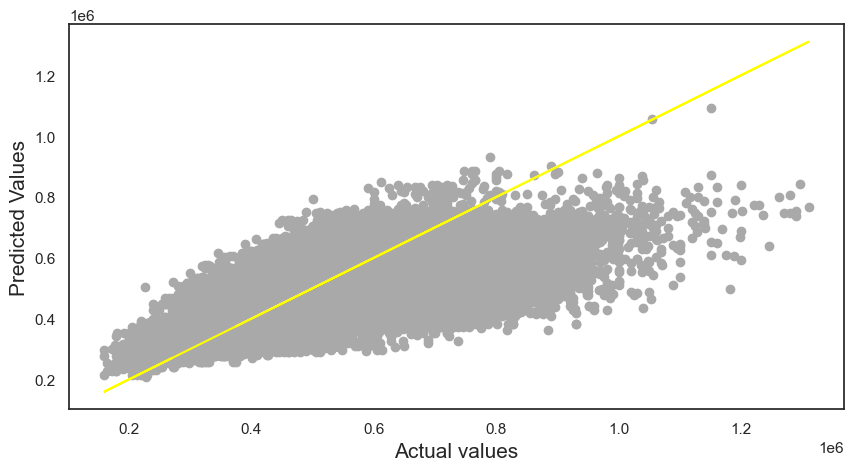

In [89]:
# visualizing the predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y5_test, y5_pred, c="darkgrey")
plt.xlabel("Actual values", fontsize=15)
plt.ylabel("Predicted Values", fontsize=15)
# Perfect predictions
plt.plot(y5_test,y5_test,"r", c= "yellow")

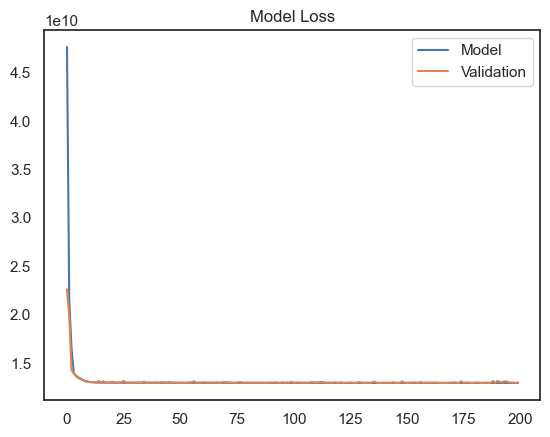

In [90]:
#visualising the training loss and test loss to see if the model is overfitting
his.history.keys() # dict_keys(['loss', 'val_loss'])

plt.plot(his.history["loss"])
plt.plot(his.history["val_loss"])
plt.title("Model Loss")
plt.legend (["Model", "Validation"], loc ="upper right")

In [91]:
from tabulate import tabulate

In [92]:
headers = ["Model","Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error", "R square"]
table = [["Linear Regression", 83406.82191079583, 12165856904.140312, 110298.94335006257, 0.5162922111046631], 
         ["RandomForestRegressor", 52786.8663710944, 5634370437.890307, 75062.44359125479, 0.7759805258434643], 
         ["K Nearest Neighbours", 57497.9786998728, 6680508845.217653, 81734.37982402297, 0.7343866373180628], 
         ["MLPRegressor", 74757.69288549208, 10371293678.558786, 101839.54869577332, 0.5876430593612711],
         ["Tensorflow", 86658.48193570768, 12979258113.019594, 113926.54700735731, 0.4839518257679021]
        ]        
           
print(tabulate(table, headers, tablefmt="github"))

| Model                 |   Mean Absolute Error |   Mean Squared Error |   Root Mean Squared Error |   R square |
|-----------------------|-----------------------|----------------------|---------------------------|------------|
| Linear Regression     |               83406.8 |          1.21659e+10 |                  110299   |   0.516292 |
| RandomForestRegressor |               52786.9 |          5.63437e+09 |                   75062.4 |   0.775981 |
| K Nearest Neighbours  |               57498   |          6.68051e+09 |                   81734.4 |   0.734387 |
| MLPRegressor          |               74757.7 |          1.03713e+10 |                  101840   |   0.587643 |
| Tensorflow            |               86658.5 |          1.29793e+10 |                  113927   |   0.483952 |


# My own prediction based on a client's requirement

Mr Tan's family wanted to buy a resale flat a Executive unit in Woodlands, between the 4th to 6th floor, 130 sqm in size, of Flat Model - standard, built in 2000 with 83 remaining on the lease

(23625	15	24	4	1306	478	4	130.0	7	2000	83.000000	470000.0)

In [93]:
random_label=hdbpricesfrom2015.iloc[[23625]]
random_label.head()

flat_type  storey_range  floor_area_sqm  flat_model  \
23625          4             4           130.0           7   

       lease_commence_date  resale_price  
23625                 2000      470000.0

In [94]:
#performing prediction on the trained models

predict_flatype = 4
predict_storeyrange = 4
predict_floorarea = 130
predict_flatmodel = 7
predict_leasecommence = 2000

predict_price1 = float(firstmodel.predict([[predict_flatype, predict_storeyrange, predict_floorarea, predict_flatmodel, predict_leasecommence]]))
predict_price2 = float(secondmodel.predict([[predict_flatype, predict_storeyrange, predict_floorarea, predict_flatmodel, predict_leasecommence]]))
predict_price3 = float(thirdmodel.predict([[predict_flatype, predict_storeyrange, predict_floorarea, predict_flatmodel, predict_leasecommence]]))
predict_price4 = float(fourthmodel.predict([[predict_flatype, predict_storeyrange, predict_floorarea, predict_flatmodel, predict_leasecommence]]))
predict_price5 = float(fifthmodel.predict([[predict_flatype, predict_storeyrange, predict_floorarea, predict_flatmodel, predict_leasecommence]]))

print("Actual resale price: $470000.00")
#print("Other predictions")
print("Prediction 1: Linear regression - ${:.2f}".format(predict_price1))
print("Prediction 2: Random Forest regression - ${:.2f}".format(predict_price2))
print("Prediction 3: KNN - ${:.2f}".format(predict_price3))
print("Prediction 4: MLPRegressor - ${:.2f}".format(predict_price4))
print("Prediction 5: Tensorflow - ${:.2f}".format(predict_price5))

Actual resale price: $470000.00
Prediction 1: Linear regression - $659980.32
Prediction 2: Random Forest regression - $550390.86
Prediction 3: KNN - $561400.00
Prediction 4: MLPRegressor - $567506.75
Prediction 5: Tensorflow - $661379.69


# Conclusion

To predict resale prices for HDB flats using different models, based on the above metrics and my prediction, Random Forest has best prediction with lowest RMSE and highest R square. This is closely followed by K nearest neighbours, MLP Regressor,  Tensorflow and Linear Regression.

RMSE of Random Forest Model is 75062. And my prediction carried out on a random data, Random Forest has a prediction with a difference 80390 between actual resale price and predicted resale price. While this is far better than the other models, there is definitely room for improvement.

The predictors that were accounted for in this project are not exhaustive. There could be other factors like proximity to MRT/LRT stations, accessibility to bus services, schools and amenities like supermarkets etc. in the neighbourhood, renovation level of the flat, future developments/projects, inflation etc. which were unaccounted for in the models, that can influence the resale pricing of HDB flats. Such factors may be included in future analysis.

# References

1. https://www.kaggle.com/code/teyang/drivers-of-hdb-resale-price-and-prediction/notebook#7.-Conclusion
2. https://www.kaggle.com/code/davegn/prediction-of-resale-hdb-prices-regression-model#6.-Model-Evaluation
3. https://pythonsolved.com/how-to-extract-integer-from-string-in-python/
4. https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/
5. https://datagy.io/python-isinstance/
6. https://pypi.org/project/tabulate/
7. https://www.analyticsvidhya.com/blog/2021/08/quick-start-with-tensorflow-callbacks/
8. https://www.youtube.com/watch?v=vSzou5zRwNQ
9. https://www.youtube.com/watch?v=zinEPDj7SD8
10.https://www.edgeprop.sg/property-news/different-types-hdb-houses-you-can-call-home
11.https://towardsdatascience.com/metrics-to-understand-regression-models-in-plain-english-part-1-c902b2f4156f
12.https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e
13.https://www.tensorflow.org/guide/keras/sequential_model
